# Project Description: 


<b>
Data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.
    
Data set for the Problem: Sparkling.csv and Rose.csv

# 1.Read the data as an appropriate Time Series data and plot the data.

In [84]:
#Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [85]:
#Import Libraries related to Timeseries
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [86]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

<b> Read Datasets

In [87]:
df_rose=pd.read_csv('Rose.csv',header=0,index_col=0,parse_dates =['YearMonth'])

In [88]:
df_rose.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

In [89]:
df_rose.shape

(187, 1)

In [90]:
df_rose.head(2)

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0

In [91]:
print('TS Start Time:' , df_rose.index.min())
print('TS End Time:' , df_rose.index.max())

TS Start Time: 1980-01-01 00:00:00
TS End Time: 1995-07-01 00:00:00


<b> Plot Times Series

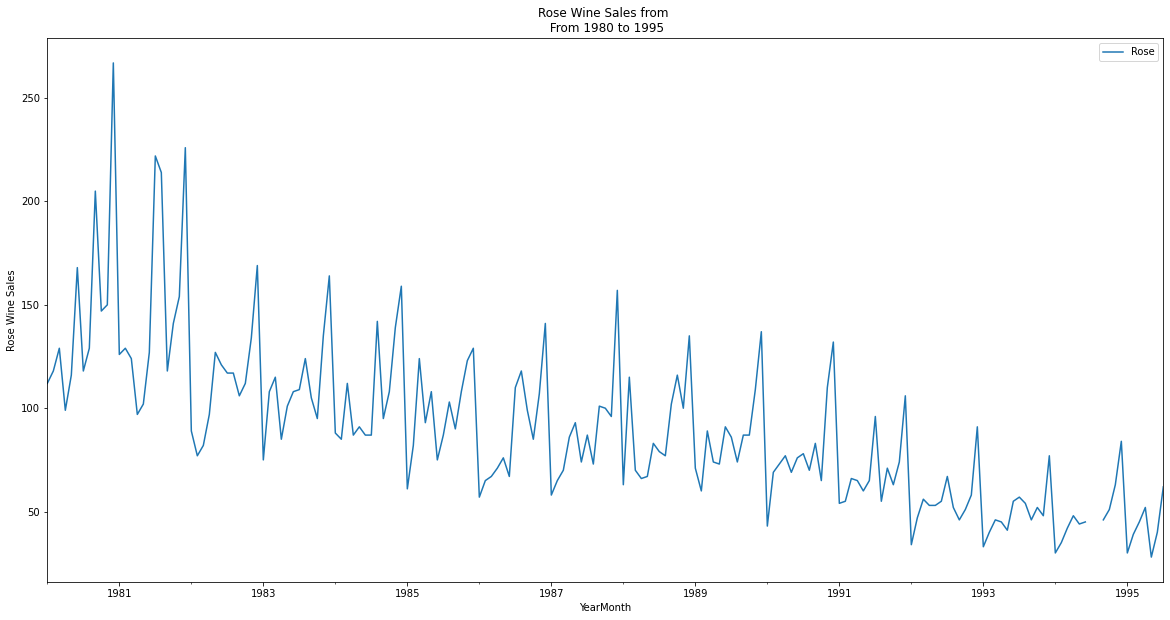

In [92]:
df_rose.plot(figsize=(20,10))
plt.ylabel('Rose Wine Sales')
plt.title('Rose Wine Sales from \n From 1980 to 1995')
plt.show()

<b> Conclusion :
    
*By visualization we can say time series is having downward trend over the years and maximum spike on sales we can identify in 1981. Time Series is having seasonality.We can identify the component in further decomposition steps
    
*Also we can see there is a gap in the continuity of the time series near 1994 year.We have to check for null/missing values in this case

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition

<b> Check 5 point summary of each Wine Sales

In [93]:
df_rose.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

<b>Null Check on dataset

In [94]:
print('Rose:',df_rose.isnull().sum())

Rose: Rose    2
dtype: int64


In [95]:
df_rose[df_rose['Rose'].isna()==True].tail(15)
#1994-07-01

#1994-08-01

Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN

<b>Interpolation

In [96]:
#Values nearer to missing values
df_rose.tail(16).head(10)

Rose
YearMonth       
1994-04-01  48.0
1994-05-01  44.0
1994-06-01  45.0
1994-07-01   NaN
1994-08-01   NaN
1994-09-01  46.0
1994-10-01  51.0
1994-11-01  63.0
1994-12-01  84.0
1995-01-01  30.0

In [97]:
#Checking 7th and 8th months data
df_rose[(df_rose.index.month==7) | (df_rose.index.month==8)]

Rose
YearMonth        
1980-07-01  118.0
1980-08-01  129.0
1981-07-01  222.0
1981-08-01  214.0
1982-07-01  117.0
1982-08-01  117.0
1983-07-01  109.0
1983-08-01  124.0
1984-07-01   87.0
1984-08-01  142.0
1985-07-01   87.0
1985-08-01  103.0
1986-07-01  110.0
1986-08-01  118.0
1987-07-01   87.0
1987-08-01   73.0
1988-07-01   79.0
1988-08-01   77.0
1989-07-01   86.0
1989-08-01   74.0
1990-07-01   78.0
1990-08-01   70.0
1991-07-01   96.0
1991-08-01   55.0
1992-07-01   67.0
1992-08-01   52.0
1993-07-01   57.0
1993-08-01   54.0
1994-07-01    NaN
1994-08-01    NaN
1995-07-01   62.0

In [98]:
#Checking overall means for 7th and 8th month
print(df_rose[df_rose.index.month==7].mean())
print(df_rose[df_rose.index.month==8].mean())

Rose    97.466667
dtype: float64
Rose    100.142857
dtype: float64


In [99]:
#Intrepolatio
df_rose=df_rose.interpolate(method='spline',order=3)

In [100]:
df_rose.tail(14).head(10)

Rose
YearMonth            
1994-06-01  45.000000
1994-07-01  43.656385
1994-08-01  44.404582
1994-09-01  46.000000
1994-10-01  51.000000
1994-11-01  63.000000
1994-12-01  84.000000
1995-01-01  30.000000
1995-02-01  39.000000
1995-03-01  45.000000

In [101]:
print('Intrepolated Values:')
df_rose[(df_rose.index=='1994-07-01') | (df_rose.index=='1994-08-01')]

Intrepolated Values:


Rose
YearMonth            
1994-07-01  43.656385
1994-08-01  44.404582

<b>Plot a year on year boxplot for Wine Sales.

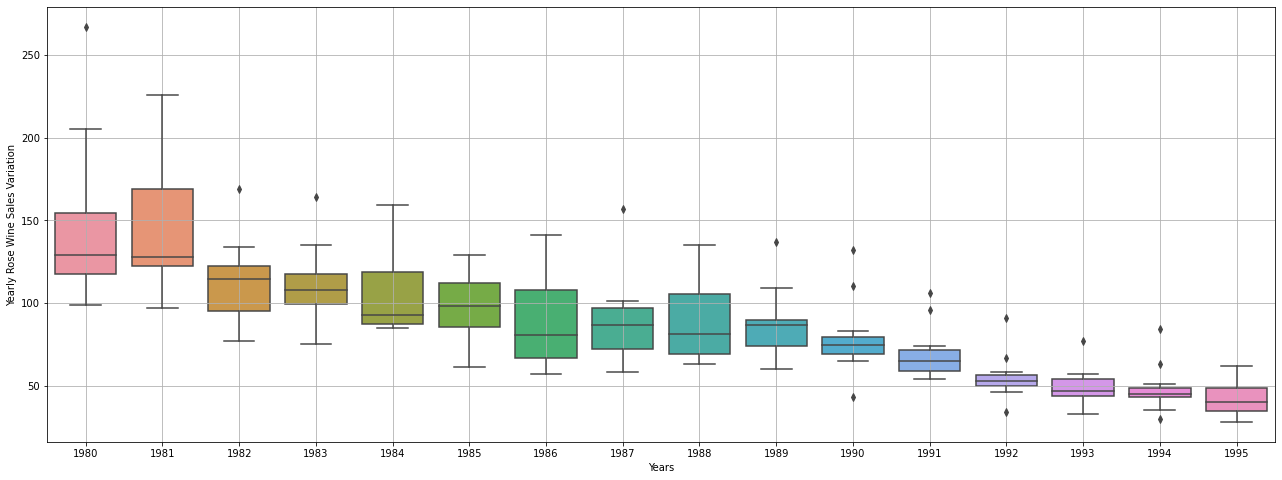

In [102]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_rose.index.year, df_rose.Rose, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose Wine Sales Variation');

<b>Plot a monthly boxplot for Wine Sales taking all the years into account.

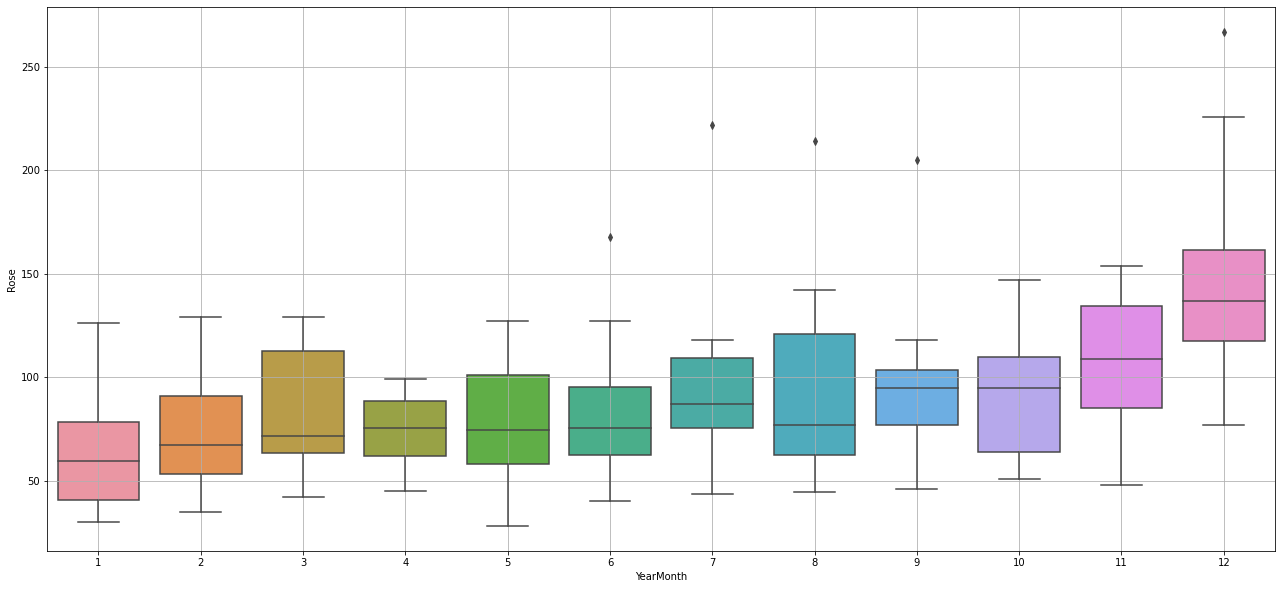

In [103]:
fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(df_rose.index.month, df_rose.Rose, ax=ax,whis=1.5)
plt.grid();

<b>Plot a monthplot of the give Time Series.

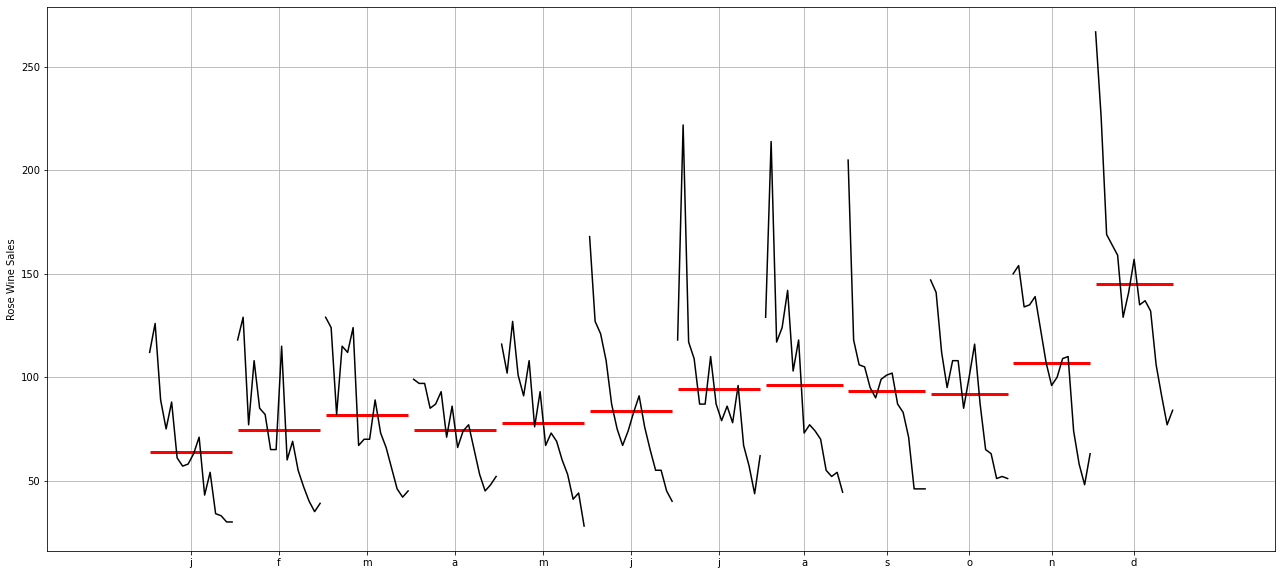

In [104]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,10))

month_plot(df_rose,ylabel='Rose Wine Sales',ax=ax)
plt.grid();

<b>Plot the Time Series according to different months for different years.

In [105]:
df_rose.head(1)

Rose
YearMonth        
1980-01-01  112.0

In [106]:
yearly_sales_across_months_rose = pd.pivot_table(df_rose, values ='Rose', columns = df_rose.index.month, 
                                        index = df_rose.index.year)

yearly_sales_across_months_rose

YearMonth     1      2      3     4      5      6           7           8   \
YearMonth                                                                    
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994        30.0   35.0   42.0  48.0   44.0   45.0   43.656385   44.404582   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

YearMonth     9      10     11     12  
YearMonth                              
1980       205.0  147.0  150.0  267.0  
1981       118.0  141.0  154.0  226.0  
1982       106.0  112.0  134.0  169.0  
1983       105.0   95.0  135.0  164.0  
1984        95.0  108.0  139.0  159.0  
1985        90.0  108.0  123.0  129.0  
1986        99.0   85.0  107.0  141.0  
1987       101.0  100.0   96.0  157.0  
1988       102.0  116.0  100.0  135.0  
1989        87.0   87.0  109.0  137.0  
1990        83.0   65.0  110.0  132.0  
1991        71.0   63.0   74.0  106.0  
1992        46.0   51.0   58.0   91.0  
1993        46.0   52.0   48.0   77.0  
1994        46.0   51.0   63.0   84.0  
1995         NaN    NaN    NaN    NaN

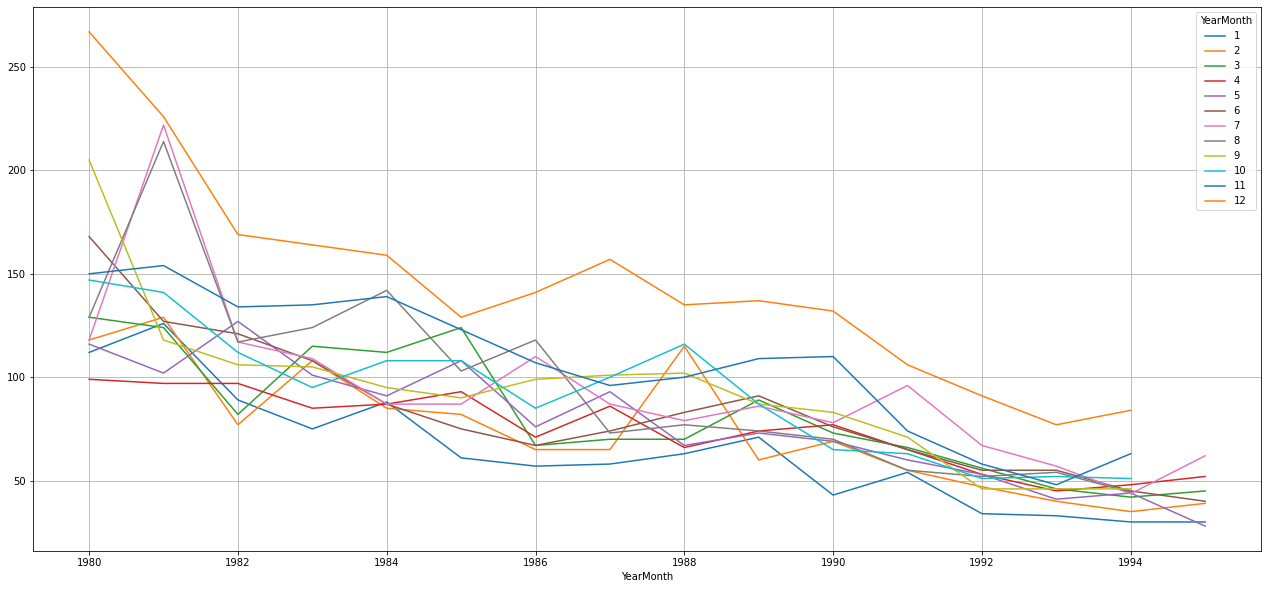

In [107]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months_rose.plot(ax=ax)
plt.grid();

<b>Read this monthly data into a quarterly and yearly format. Compare the Time Series plot and draw inferences.

<b>Yearly Plot

In [108]:
df_yearly_sum_rose = df_rose.resample('A').sum()
print(df_yearly_sum_rose.head(3))
df_yearly_mean_rose = df_rose.resample('A').mean()
print(df_yearly_mean_rose.head(3))

              Rose
YearMonth         
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
                  Rose
YearMonth             
1980-12-31  146.500000
1981-12-31  148.333333
1982-12-31  112.333333


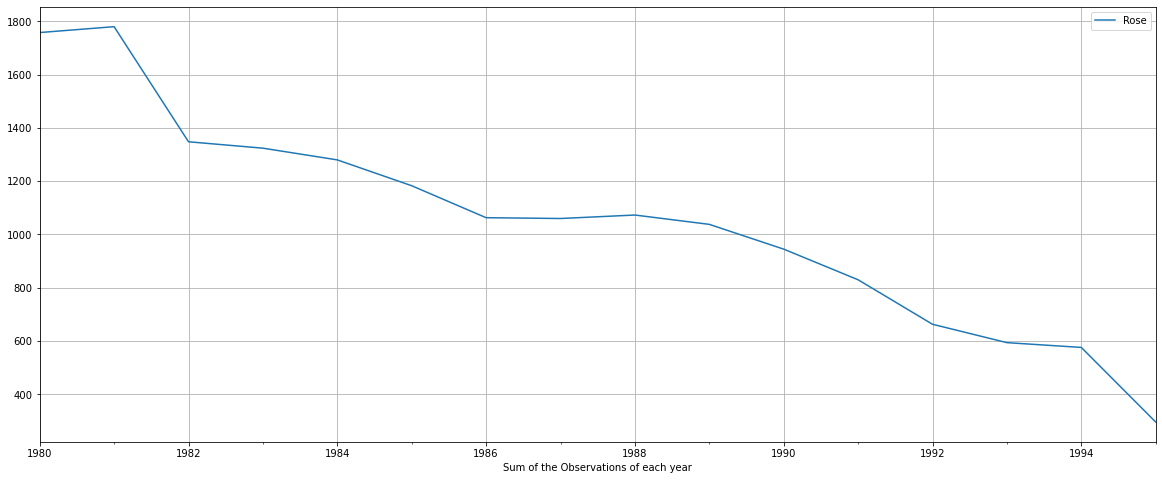

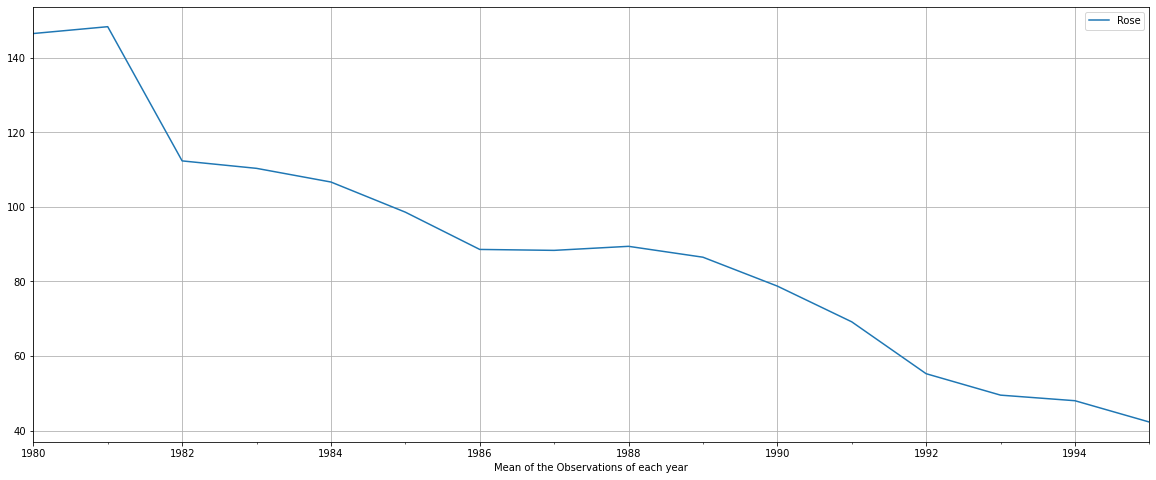

In [109]:
df_yearly_sum_rose.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');
df_yearly_mean_rose.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

<b>Quarterly Plot

In [110]:
df_quarterly_sum_rose = df_rose.resample('Q').sum()
print(df_quarterly_sum_rose.head())
df_quarterly_mean_rose = df_rose.resample('Q').mean()
print(df_quarterly_mean_rose.head())

             Rose
YearMonth        
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0
                  Rose
YearMonth             
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333


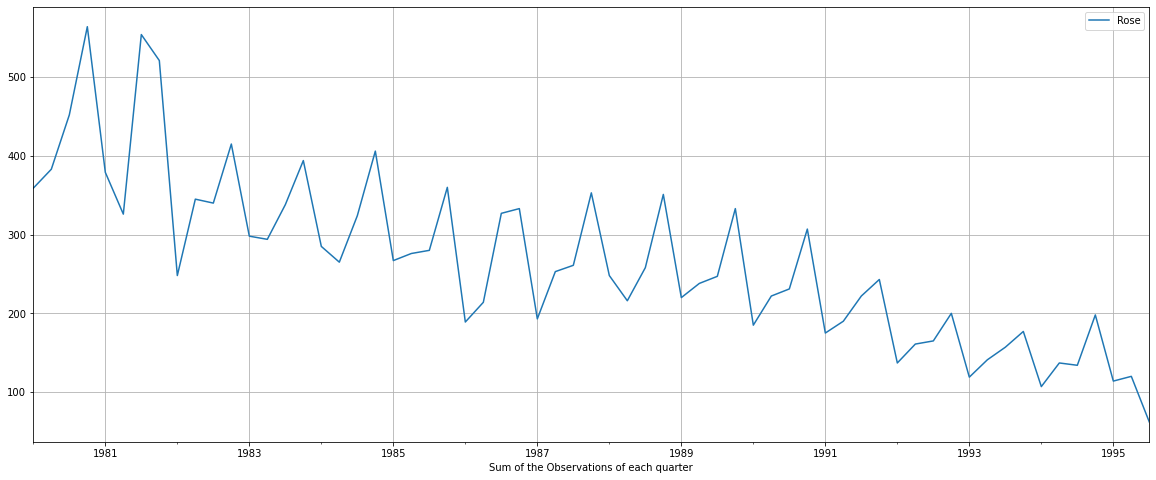

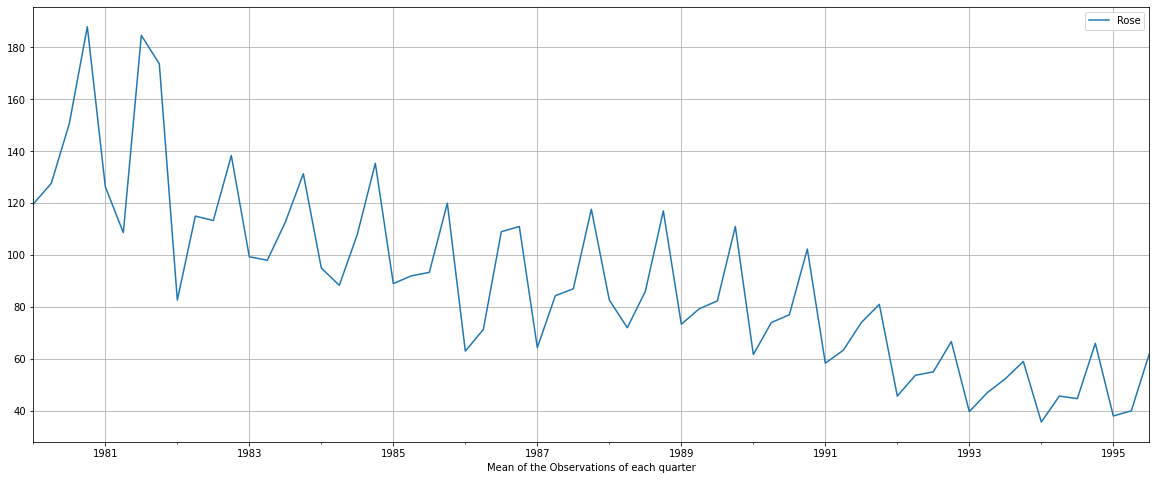

In [111]:
df_quarterly_sum_rose.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each quarter');
df_quarterly_mean_rose.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each quarter');

<b>Daily Plot

In [112]:
df_daily_sum_rose = df_rose.resample('D').sum()
print(df_daily_sum_rose.head())

             Rose
YearMonth        
1980-01-01  112.0
1980-01-02    0.0
1980-01-03    0.0
1980-01-04    0.0
1980-01-05    0.0


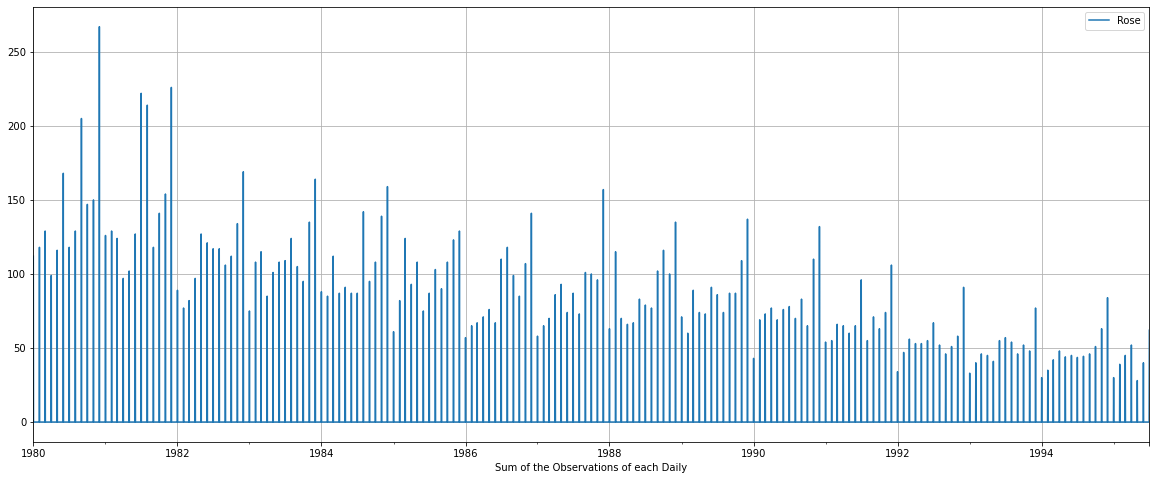

In [113]:
df_daily_sum_rose.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each Daily');

<b>Plot Empherical Cumative Distribution

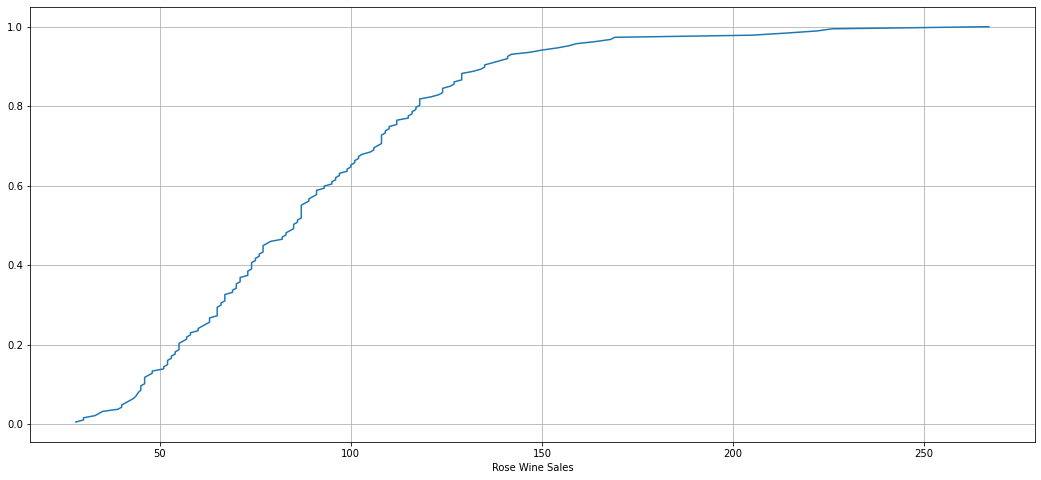

In [114]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose Wine Sales');

<b> This Graph gives percentage of sales 

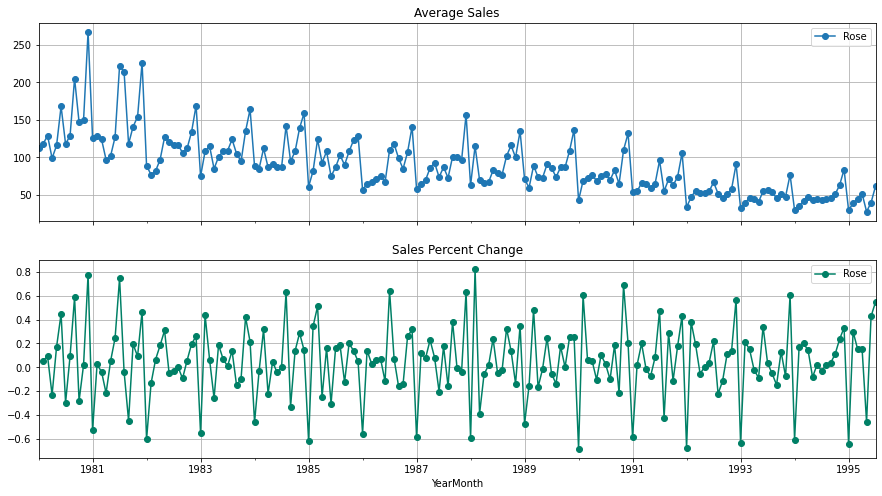

In [115]:
# group by date and get average Sales, and precent change
average    = df_rose.groupby(df_rose.index)["Rose"].mean()
pct_change = df_rose.groupby(df_rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

<b>The above two graphs tells us the Average 'Rose wine sales' and the Percentage change of 'Rose wine sales' with respect to the time.

# Decompose the Time Series

<b>Rose Wine : Additive and Multiplicative Model Decomposition

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose

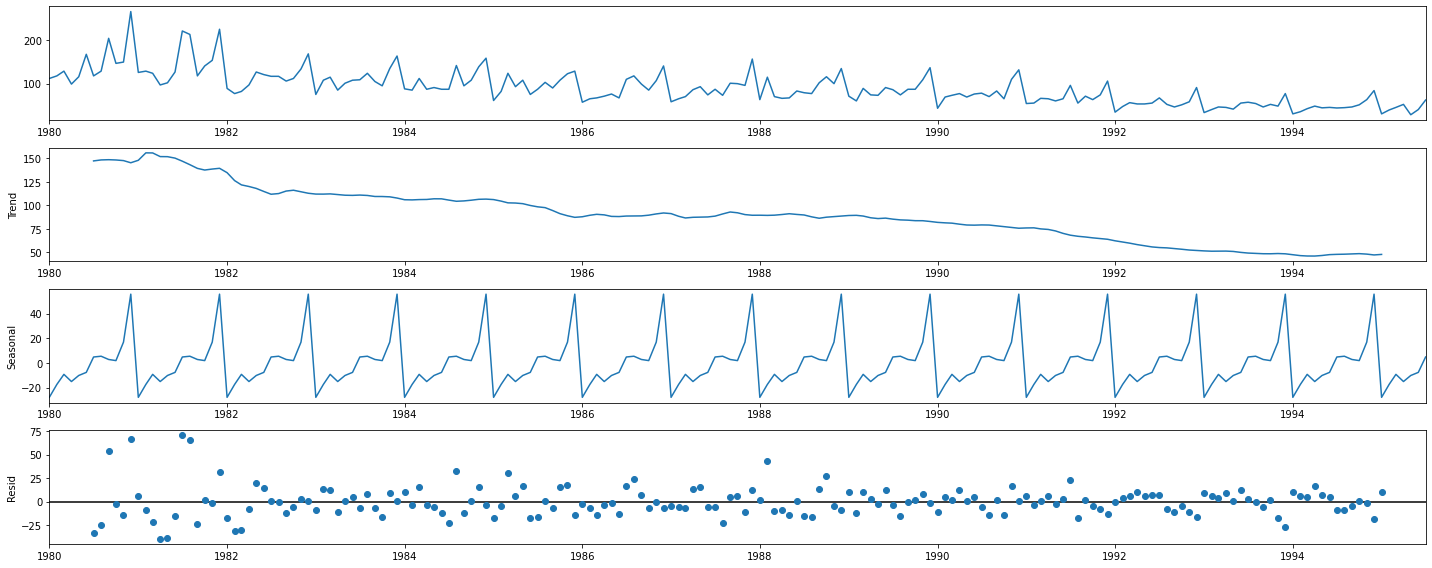

In [117]:
decomposition_rose = seasonal_decompose(df_rose,model='additive')
decomposition_rose.plot();

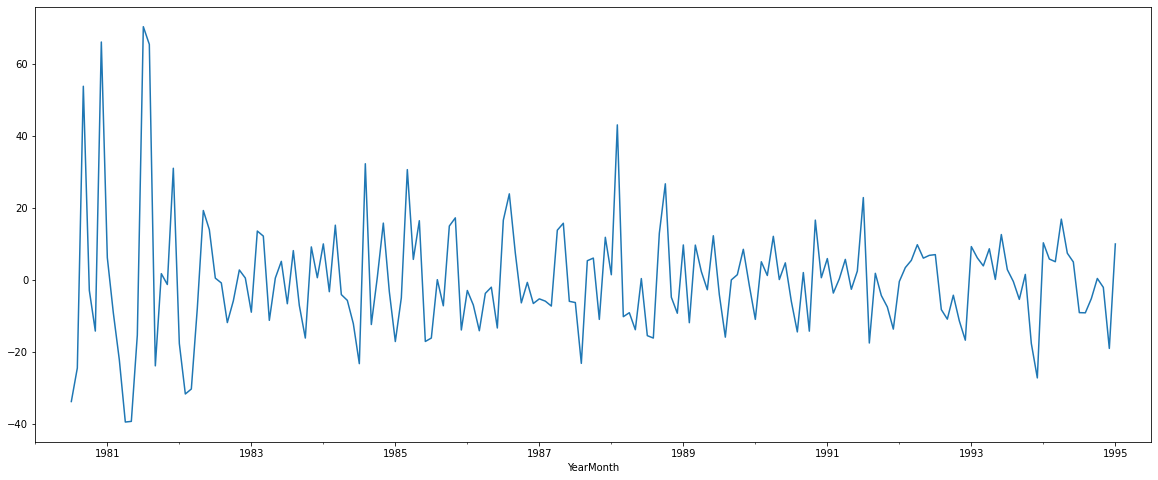

In [118]:
decomposition_rose.resid.plot()

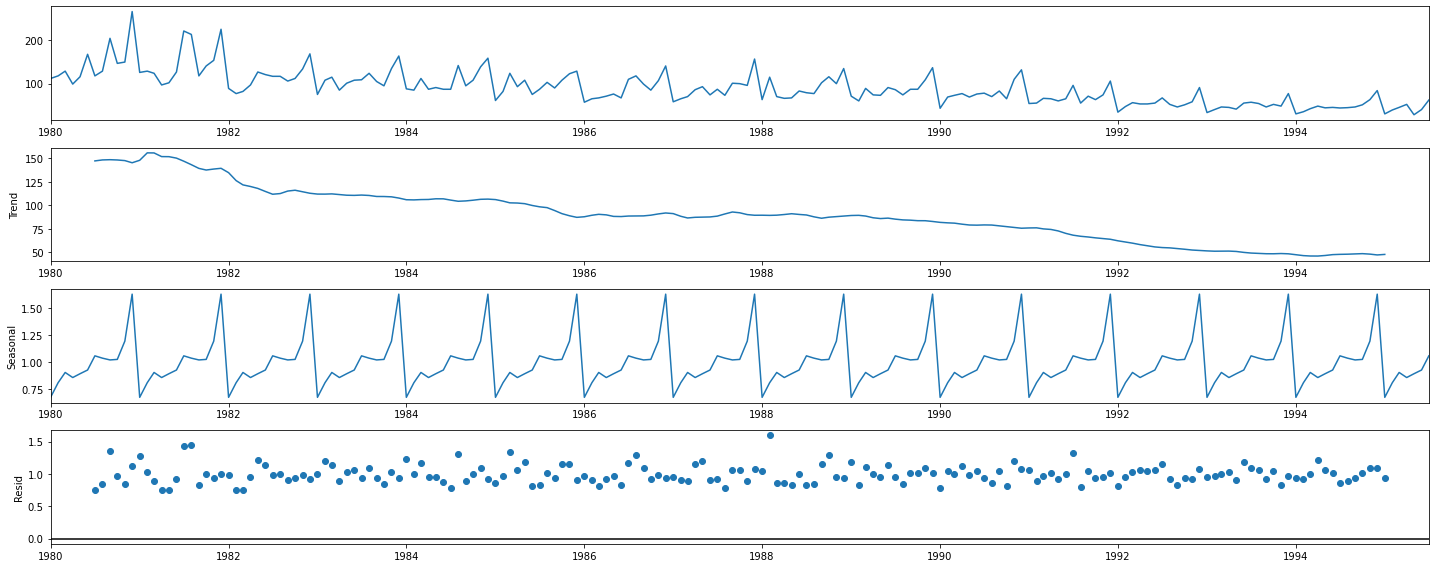

In [119]:
decomposition_rose = seasonal_decompose(df_rose,model='multiplicative')
decomposition_rose.plot();

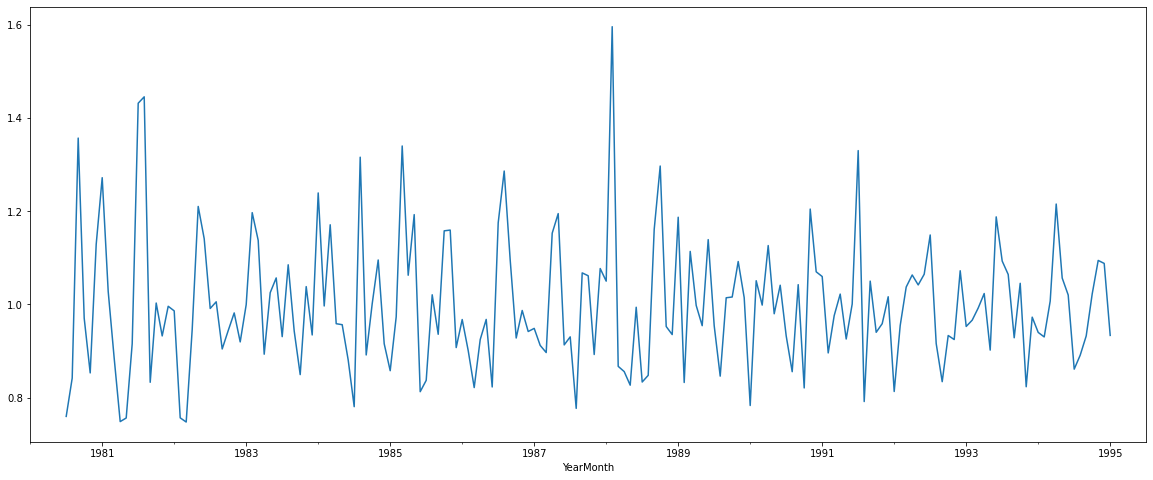

In [120]:
decomposition_rose.resid.plot()

In [121]:
trend = decomposition_rose.trend
seasonality = decomposition_rose.seasonal
residual = decomposition_rose.resid

In [122]:
print('Trend','\n',trend.head(4),'\n')
print('Seasonality','\n',seasonality.head(4),'\n')
print('Residual','\n',residual.head(4),'\n')

Trend 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670317
1980-02-01    0.806374
1980-03-01    0.901496
1980-04-01    0.854406
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01   NaN
1980-02-01   NaN
1980-03-01   NaN
1980-04-01   NaN
Name: resid, dtype: float64 



<b>Plot the average Sales per month and the month on month percentage change of Sales.

<b> Deseasonalized Time Series

In [123]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.843044
1980-08-01    148.966890
1980-09-01    149.732265
1980-10-01    149.053784
1980-11-01    148.269740
1980-12-01    146.254237
dtype: float64

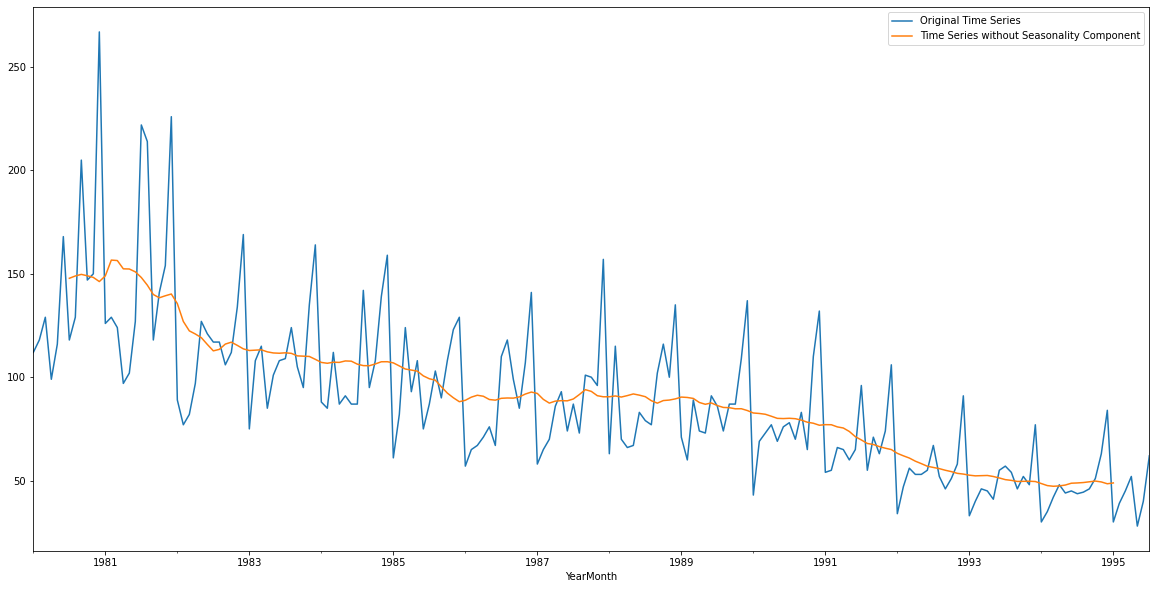

In [124]:
df_rose.plot(figsize=(20,10))
deaseasonalized_ts.plot(figsize=(20,10))
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

<b> 
    
    *Series is showing strong seasonal component
    *Trend is in decremental way towards increase in year
    *From TS decomposition we can infer that it is Multiplicative in Nature   

# 3.Split the data into training and test. The test data should start in 1991.

<b>#Creating train and test set 

In [125]:
train=df_rose[df_rose.index.year<1991]
test=df_rose[df_rose.index.year>=1991]
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


<b>#Printing the beginning and the ending of the training data

In [126]:
print("\n Training data start at \n")
print (train[train.index == train.index.min()],['Year','Quarter'],'\n')
print("\n Training data ends at \n")
print (train[train.index == train.index.max()],['Year','Quarter'],'\n')


 Training data start at 

             Rose
YearMonth        
1980-01-01  112.0 ['Year', 'Quarter'] 


 Training data ends at 

             Rose
YearMonth        
1990-12-01  132.0 ['Year', 'Quarter'] 



<b>#Printing the beginning and the ending of the test data

In [127]:
print("\n Test data start at \n")
print (test[test.index == test.index.min()],['Year','Quarter'],'\n')
print("\n Test data ends at \n")
print (test[test.index == test.index.max()],['Year','Quarter'],'\n')


 Test data start at 

            Rose
YearMonth       
1991-01-01  54.0 ['Year', 'Quarter'] 


 Test data ends at 

            Rose
YearMonth       
1995-07-01  62.0 ['Year', 'Quarter'] 



<b>#Plotting the training and test data

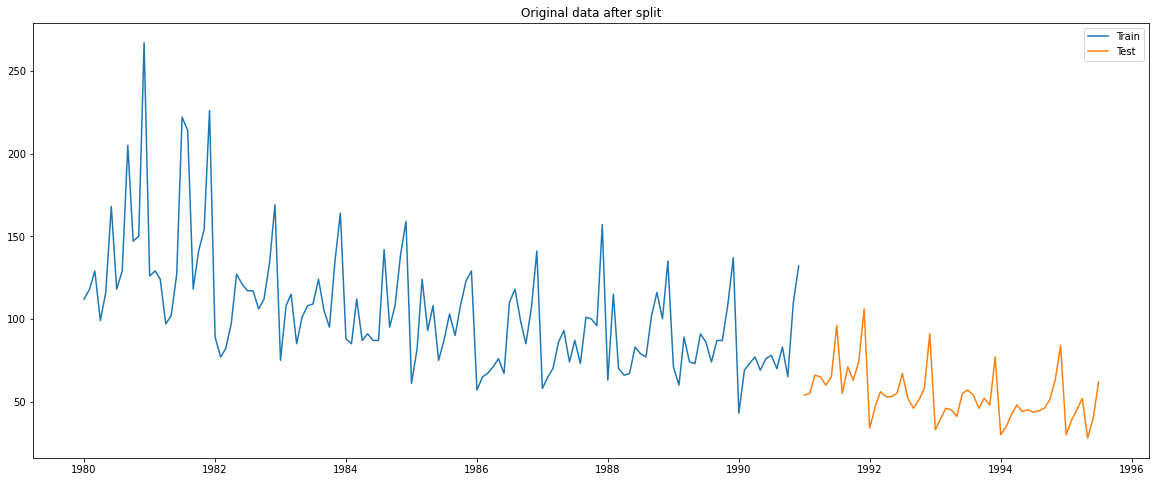

In [128]:
plt.plot(train.Rose, label = 'Train')
plt.plot(test.Rose,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Original data after split')
plt.show()

<b> Conclusion  : Train and Test Data is splitted.Test Samples are available from 1991 onwwards

# 4.Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.


# Building different models and comparing the accuracy metrics.

# Model 1: Linear Regression

In [129]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


<b>We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [130]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [131]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



<b>Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
lr = LinearRegression()

In [134]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

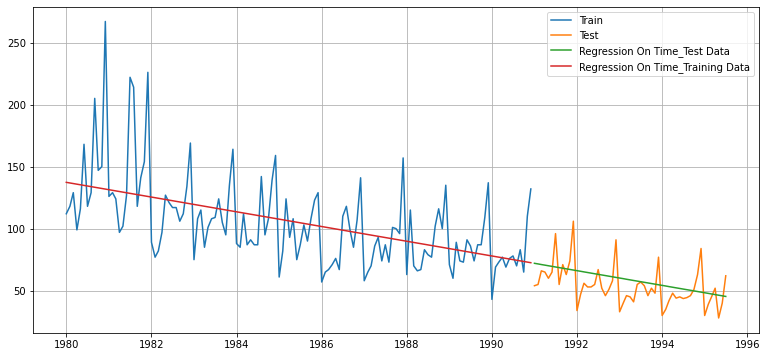

In [135]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

<b>Functions and Accuracy Metrics

In [136]:
from sklearn import metrics

In [137]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

# Model Evaluation

In [138]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Rose'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Rose'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 30.718 MAPE is 21.22


In [139]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.291 MAPE is 22.94


In [140]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.291197      22.94

# Model 2: Naive Approach:

In [141]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [142]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    132.0
1980-02-01    132.0
1980-03-01    132.0
1980-04-01    132.0
1980-05-01    132.0
Name: naive, dtype: float64

In [143]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

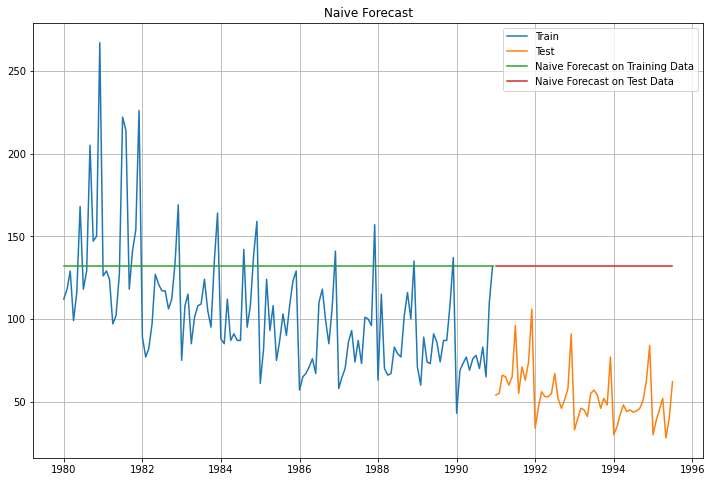

In [144]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

# Model Evaluation

In [145]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Rose'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 45.064 MAPE is 36.38


In [146]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.777 MAPE is 145.35


In [147]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.291197      22.94
NaiveModel        79.777253     145.35

# Method 3: Simple Average

In [148]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [149]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train['mean_forecast'] = train['Rose'].mean()
SimpleAverage_train.head()

Rose  mean_forecast
YearMonth                       
1980-01-01  112.0     104.939394
1980-02-01  118.0     104.939394
1980-03-01  129.0     104.939394
1980-04-01   99.0     104.939394
1980-05-01  116.0     104.939394

In [150]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

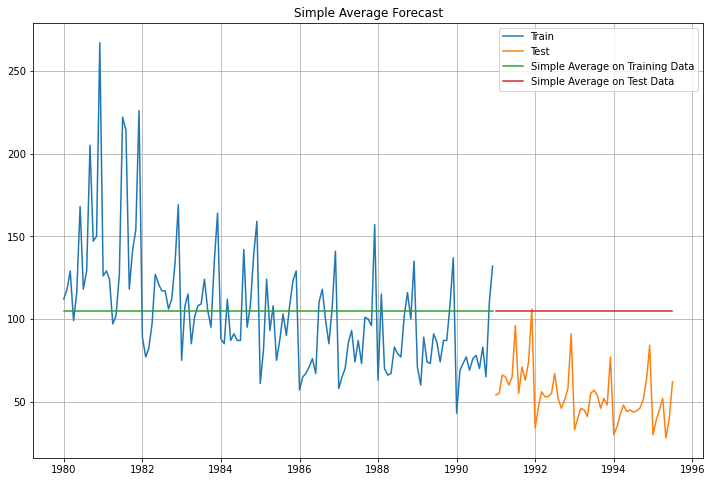

In [151]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [152]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Rose'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 36.034 MAPE is 25.39


In [153]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.521 MAPE is 95.12


In [154]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    15.291197      22.94
NaiveModel          79.777253     145.35
SimpleAverageModel  53.520722      95.12

# Method 4: Moving Average(MA)

In [155]:
MovingAverage = df_rose.copy()
print(MovingAverage.head(2),'\n')
print(MovingAverage.shape)

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0 

(187, 1)


<b>Trailing moving averages

In [156]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head(10)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0      114.50         NaN         NaN
1980-05-01  116.0       107.5      115.50         NaN         NaN
1980-06-01  168.0       142.0      128.00  123.666667         NaN
1980-07-01  118.0       143.0      125.25  124.666667         NaN
1980-08-01  129.0       123.5      132.75  126.500000         NaN
1980-09-01  205.0       167.0      155.00  139.166667  132.666667
1980-10-01  147.0       176.0      149.75  147.166667  136.555556

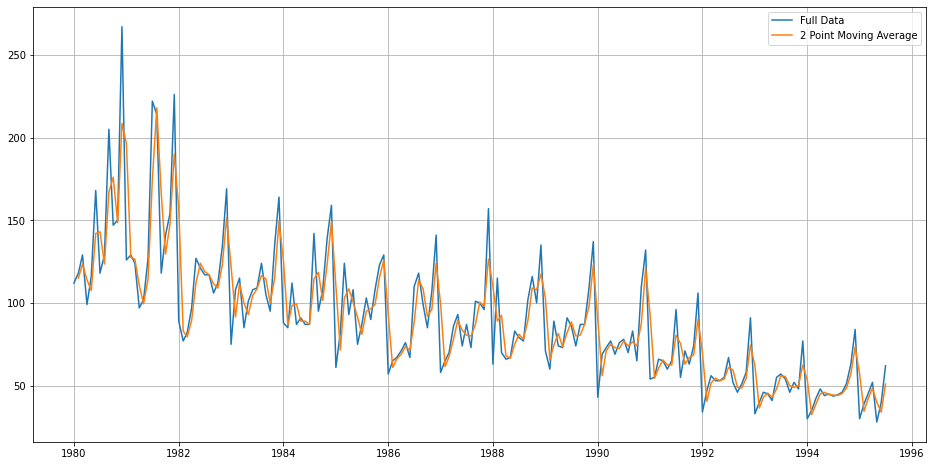

In [157]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Full Data')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

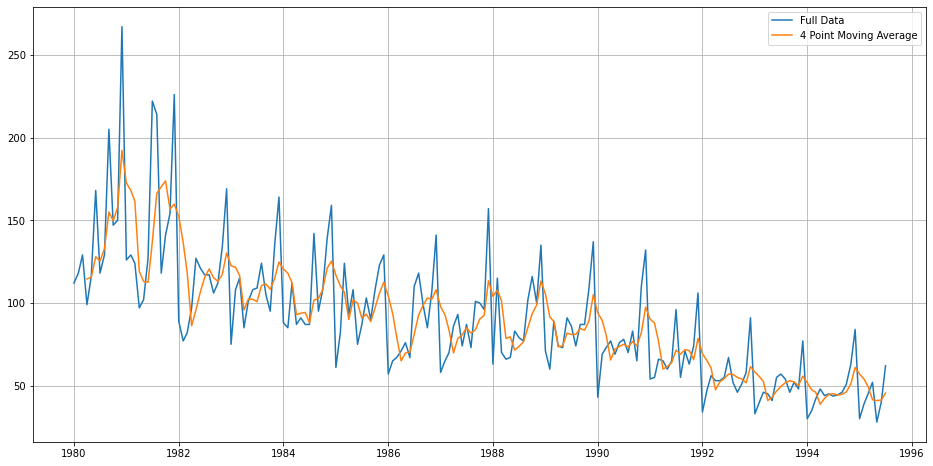

In [158]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Full Data')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

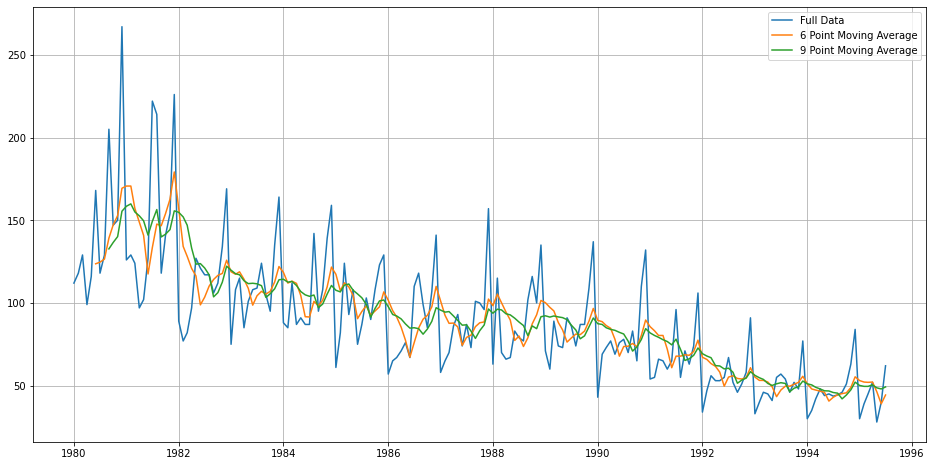

In [159]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Full Data')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

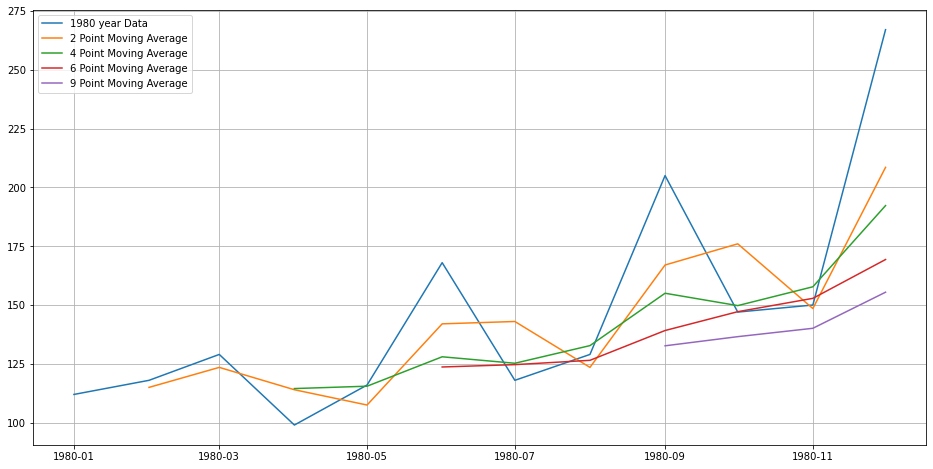

In [160]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'][MovingAverage.index.year==1980], label='1980 year Data')
plt.plot(MovingAverage['Trailing_2'][MovingAverage.index.year==1980], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'][MovingAverage.index.year==1980], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'][MovingAverage.index.year==1980],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'][MovingAverage.index.year==1980],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [161]:
MovingAverage.head(2)

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN

In [162]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year<1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year>=1991]
print(trailing_MovingAverage_train.head(1))
print(trailing_MovingAverage_test.head(1))

             Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
            Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                       
1991-01-01  54.0        93.0       90.25   85.666667   81.888889


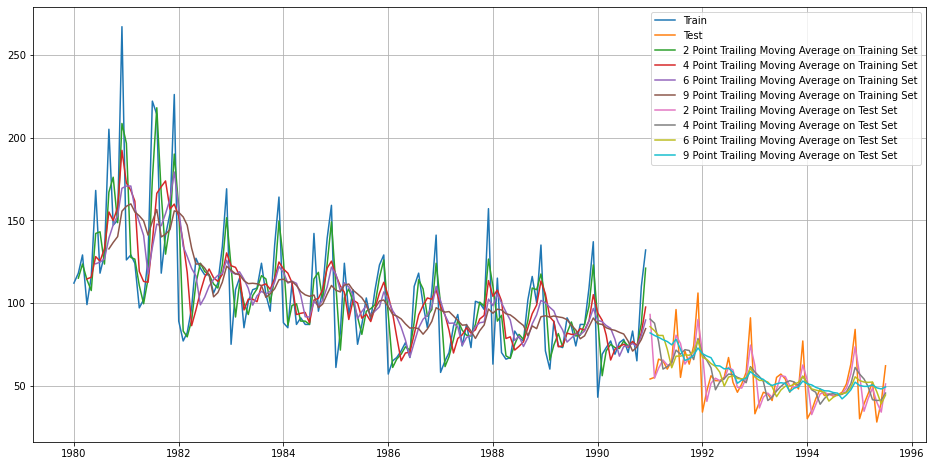

In [163]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

# Model Evaluation

In [164]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 11.530 MAPE is 13.60
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 14.462 MAPE is 19.59
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.587 MAPE is 20.83
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.740 MAPE is 21.12


In [165]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             15.291197      22.94
NaiveModel                   79.777253     145.35
SimpleAverageModel           53.520722      95.12
2pointTrailingMovingAverage  11.530180      13.60
4pointTrailingMovingAverage  14.462023      19.59
6pointTrailingMovingAverage  14.586830      20.83
9pointTrailingMovingAverage  14.739957      21.12

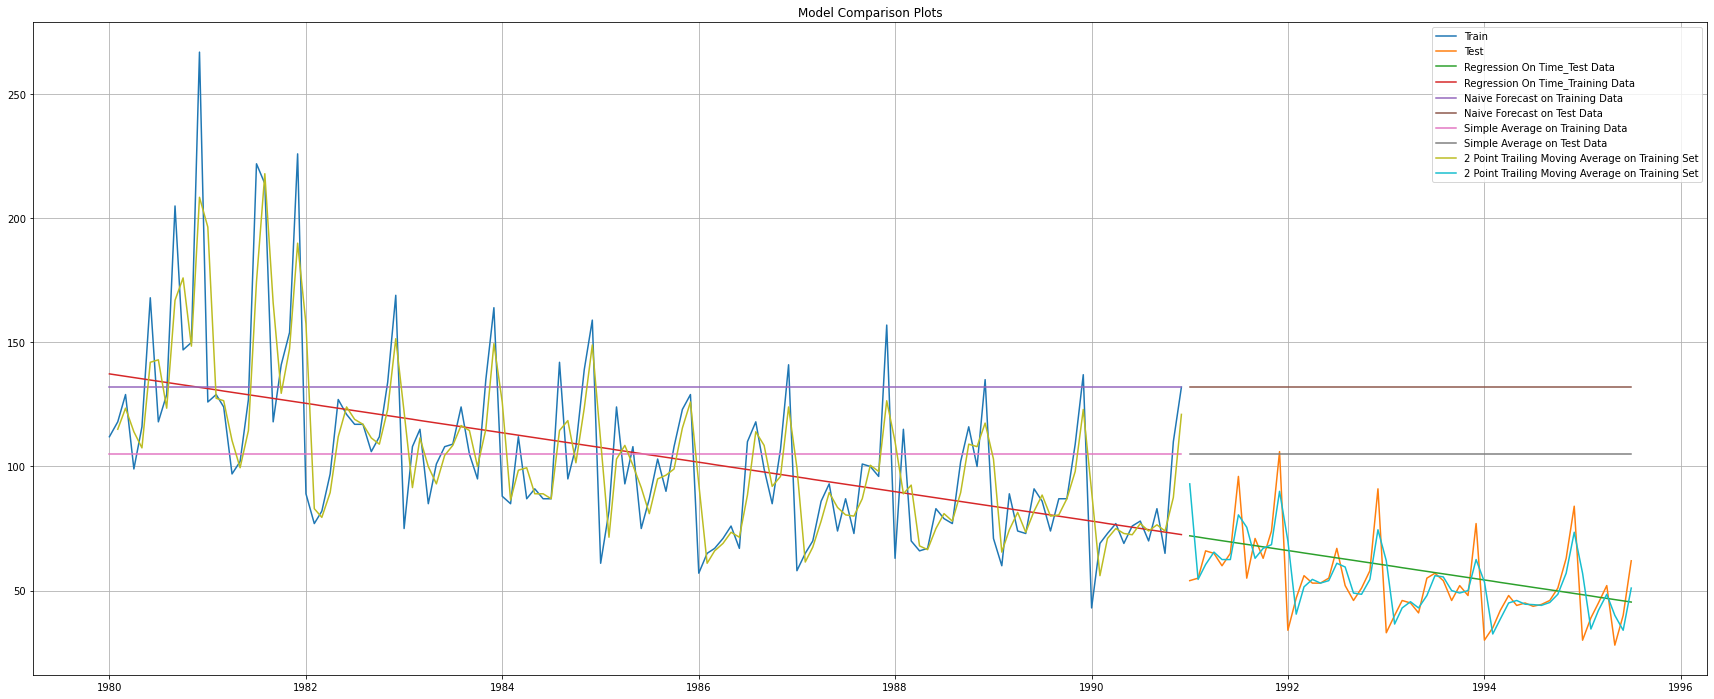

In [166]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Method 5: Simple Exponential Smoothing

In [167]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [168]:
SES_train = train.copy()
SES_test = test.copy()

In [169]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [170]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [171]:
model_SES_autofit.params

{'smoothing_level': 0.09875011379318786,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.3871259031439,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [172]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Rose     predict
YearMonth                    
1980-01-01  112.0  134.387126
1980-02-01  118.0  132.176395
1980-03-01  129.0  130.776474
1980-04-01   99.0  130.601047
1980-05-01  116.0  127.480440

In [173]:
len(SES_test)

55

In [174]:
SES_test['predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.105005
1991-02-01  55.0  87.105005
1991-03-01  66.0  87.105005
1991-04-01  65.0  87.105005
1991-05-01  60.0  87.105005

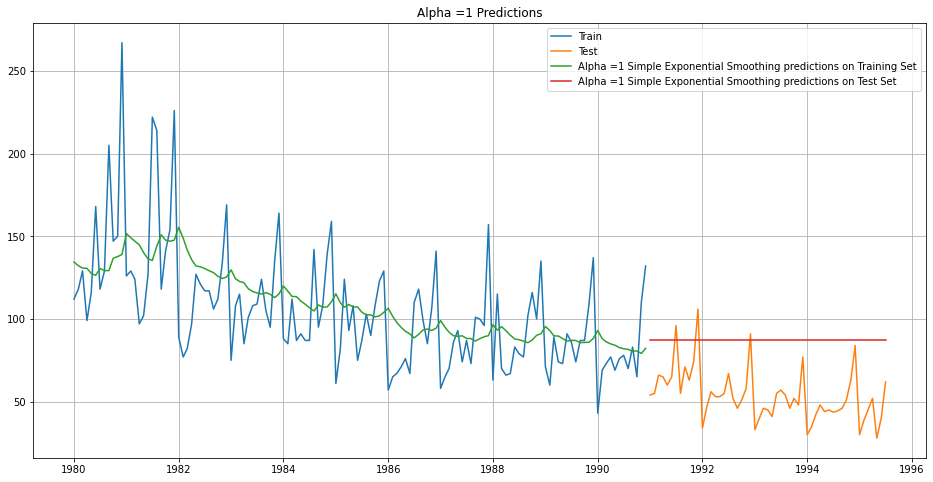

In [175]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

# Model Evaluation for  𝛼  = 1 : Simple Exponential Smoothing

In [176]:
## Training Data

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Rose'],SES_train['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 31.501 MAPE is 22.73


In [177]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Rose'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Testdata,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =1 Simple Exponential Smoothing Model forecast on the Testdata,  RMSE is 36.858 MAPE is 64.04


In [178]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                    15.291197      22.94
NaiveModel                          79.777253     145.35
SimpleAverageModel                  53.520722      95.12
2pointTrailingMovingAverage         11.530180      13.60
4pointTrailingMovingAverage         14.462023      19.59
6pointTrailingMovingAverage         14.586830      20.83
9pointTrailingMovingAverage         14.739957      21.12
Alpha=1,SimpleExponentialSmoothing  36.857739      64.04

# Setting different alpha values.

In [179]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [180]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Rose'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

<b>Model Evaluation

In [181]:
resultsDf_6

Alpha Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0           0.3   32.448833       22.31  47.565460      83.89
1           0.4   33.028400       22.51  53.827534      95.70
2           0.5   33.680192       22.69  59.701471     107.02
3           0.6   34.439946       22.89  65.030609     117.25
4           0.7   35.322683       23.09  69.757188     126.29
5           0.8   36.334371       23.42  73.832784     134.06
6           0.9   37.482735       23.93  77.197887     140.45

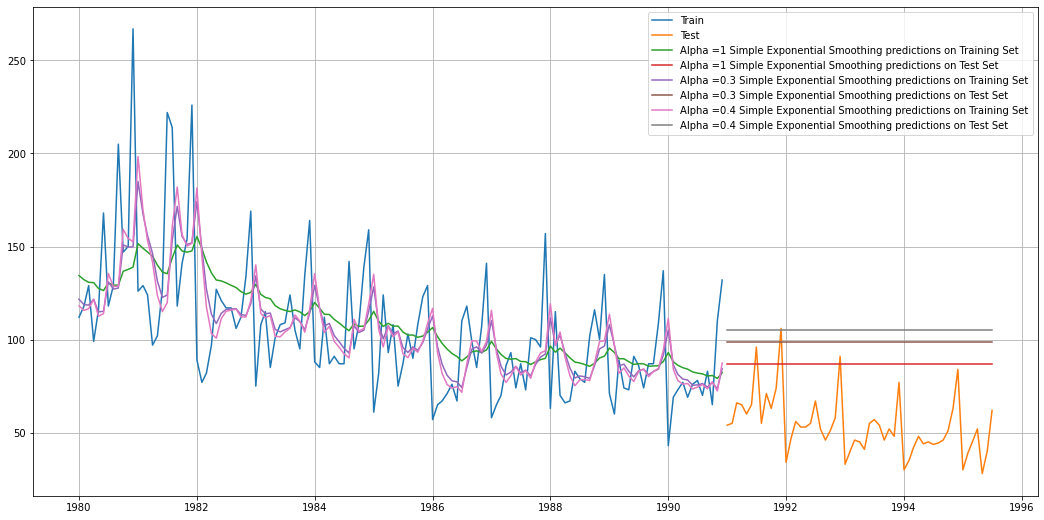

In [182]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [183]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0],resultsDf_6['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_6['Test MAPE'][0],resultsDf_6['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing','Alpha=0.4,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      15.291197      22.94
NaiveModel                            79.777253     145.35
SimpleAverageModel                    53.520722      95.12
2pointTrailingMovingAverage           11.530180      13.60
4pointTrailingMovingAverage           14.462023      19.59
6pointTrailingMovingAverage           14.586830      20.83
9pointTrailingMovingAverage           14.739957      21.12
Alpha=1,SimpleExponentialSmoothing    36.857739      64.04
Alpha=0.3,SimpleExponentialSmoothing  47.565460      83.89
Alpha=0.4,SimpleExponentialSmoothing  53.827534      95.70

# Method 6: Double Exponential Smoothing (Holt's Model)

In [184]:
DES_train = train.copy()
DES_test = test.copy()

In [185]:
model_DES = Holt(DES_train['Rose'])

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [186]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [187]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Rose'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Rose'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [188]:
resultsDf_7.sort_values(by=['Test RMSE']).head(4)

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0            0.3          0.3   35.928003       25.51  265.638869     443.04
8            0.4          0.3   36.733732       25.57  339.377747     566.08
1            0.3          0.4   37.393239       26.53  358.822441     594.60
16           0.5          0.3   37.424080       25.45  394.343797     657.92

In [189]:
resultsDf_7.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Train RMSE  Train MAPE   Test RMSE  Test MAPE
0            0.3          0.3   35.928003       25.51  265.638869     443.04
8            0.4          0.3   36.733732       25.57  339.377747     566.08
1            0.3          0.4   37.393239       26.53  358.822441     594.60
16           0.5          0.3   37.424080       25.45  394.343797     657.92
9            0.4          0.4   37.982228       26.45  442.036973     733.08

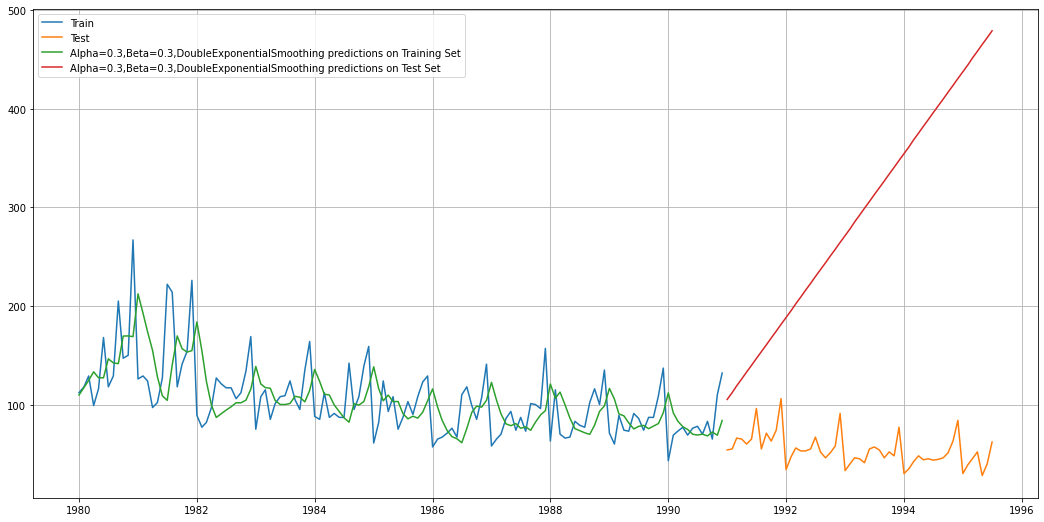

In [190]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [191]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                15.291197      22.94
NaiveModel                                      79.777253     145.35
SimpleAverageModel                              53.520722      95.12
2pointTrailingMovingAverage                     11.530180      13.60
4pointTrailingMovingAverage                     14.462023      19.59
6pointTrailingMovingAverage                     14.586830      20.83
9pointTrailingMovingAverage                     14.739957      21.12
Alpha=1,SimpleExponentialSmoothing              36.857739      64.04
Alpha=0.3,SimpleExponentialSmoothing            47.565460      83.89
Alpha=0.4,SimpleExponentialSmoothing            53.827534      95.70
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing  265.638869     443.04

# Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [192]:
TES_train = train.copy()
TES_test = test.copy()

In [193]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',seasonal_periods = 12)

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [194]:
model_TES_autofit = model_TES.fit()

In [195]:
model_TES_autofit.params

{'smoothing_level': 0.10609640094372683,
 'smoothing_slope': 0.04843842184682137,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.6556523071023,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550197, 1.65927067, 1.80572557, 1.58888753, 1.77822627,
        1.92604274, 2.1164936 , 2.251351  , 2.11690479, 2.0811273 ,
        2.40927165, 3.30447966]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [196]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Rose  auto_predict
YearMonth                      
1980-01-01  112.0    113.105566
1980-02-01  118.0    127.054181
1980-03-01  129.0    137.165575
1980-04-01   99.0    119.844333
1980-05-01  116.0    131.432536

In [197]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

Rose  auto_predict
YearMonth                     
1991-01-01  54.0     56.674336
1991-02-01  55.0     63.471273
1991-03-01  66.0     68.788790
1991-04-01  65.0     60.277827
1991-05-01  60.0     67.180380

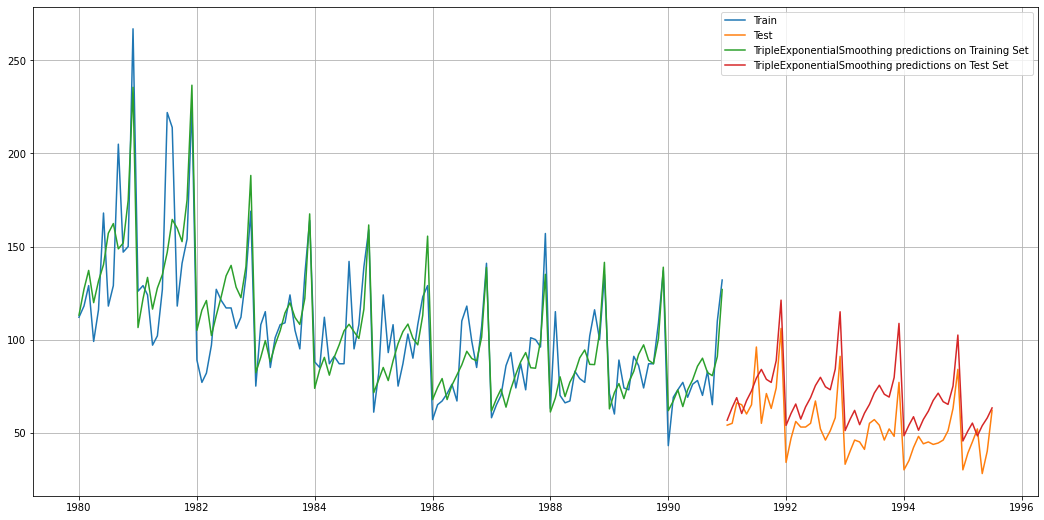

In [198]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['auto_predict'], label='TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [199]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Rose'],TES_train['auto_predict'])
print("For Alpha: 0.10609640094372683,Beta: 04843842184682137 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1, mape_model6_train_1))


For Alpha: 0.10609640094372683,Beta: 04843842184682137 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 18.579 MAPE is 13.21


In [200]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Rose'],TES_test['auto_predict'])
print("For Alpha: 0.10609640094372683,Beta: 0.04843842184682137 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1, mape_model6_test_1))

For Alpha: 0.10609640094372683,Beta: 0.04843842184682137 and Gamma: 0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 17.444 MAPE is 29.01


In [201]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.106,Beta=0.0484,Gamma=0.0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     15.291197      22.94
NaiveModel                                           79.777253     145.35
SimpleAverageModel                                   53.520722      95.12
2pointTrailingMovingAverage                          11.530180      13.60
4pointTrailingMovingAverage                          14.462023      19.59
6pointTrailingMovingAverage                          14.586830      20.83
9pointTrailingMovingAverage                          14.739957      21.12
Alpha=1,SimpleExponentialSmoothing                   36.857739      64.04
Alpha=0.3,SimpleExponentialSmoothing                 47.565460      83.89
Alpha=0.4,SimpleExponentialSmoothing                 53.827534      95.70
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.638869     443.04
Alpha=0.106,Beta=0.0484,Gamma=0.0,TripleExponen...   17.443897      29.01

In [202]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [203]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Rose'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Rose'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [204]:
resultsDf_8_2

Alpha Values  Beta Values  Gamma Values    Train RMSE  Train MAPE  \
0             0.3          0.3           0.3     23.015713       16.25   
1             0.3          0.3           0.4     24.209084       16.78   
2             0.3          0.3           0.5     25.730329       17.50   
3             0.3          0.3           0.6     27.549930       18.44   
4             0.3          0.3           0.7     30.568635       19.41   
..            ...          ...           ...           ...         ...   
507           1.0          1.0           0.6  28358.458519     3085.88   
508           1.0          1.0           0.7  30724.126331     4617.55   
509           1.0          1.0           0.8   1218.755446      493.75   
510           1.0          1.0           0.9  14150.253251     2303.41   
511           1.0          1.0           1.0   1768.254189      614.79   

        Test RMSE  Test MAPE  
0       20.873991      34.12  
1       10.150082      13.58  
2       31.596923      47.07  
3       73.250179     114.10  
4      122.413526     191.25  
..            ...        ...  
507   9603.641148    7820.55  
508  23029.955499   11847.91  
509   9626.694721    8589.43  
510   9691.903900    7923.96  
511   8138.609655    6817.72  

[512 rows x 7 columns]

In [205]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
1             0.3          0.3           0.4   24.209084       16.78   
8             0.3          0.4           0.3   28.111886       17.08   
69            0.4          0.3           0.8   32.601491       19.30   
16            0.3          0.5           0.3   29.087520       17.50   
131           0.5          0.3           0.6   32.144773       18.75   

     Test RMSE  Test MAPE  
1    10.150082      13.58  
8    10.966434      15.20  
69   12.615431      15.75  
16   14.362661      21.17  
131  16.674574      24.49

In [206]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
1             0.3          0.3           0.4   24.209084       16.78   
8             0.3          0.4           0.3   28.111886       17.08   
69            0.4          0.3           0.8   32.601491       19.30   
16            0.3          0.5           0.3   29.087520       17.50   
131           0.5          0.3           0.6   32.144773       18.75   

     Test RMSE  Test MAPE  
1    10.150082      13.58  
8    10.966434      15.20  
69   12.615431      15.75  
16   14.362661      21.17  
131  16.674574      24.49

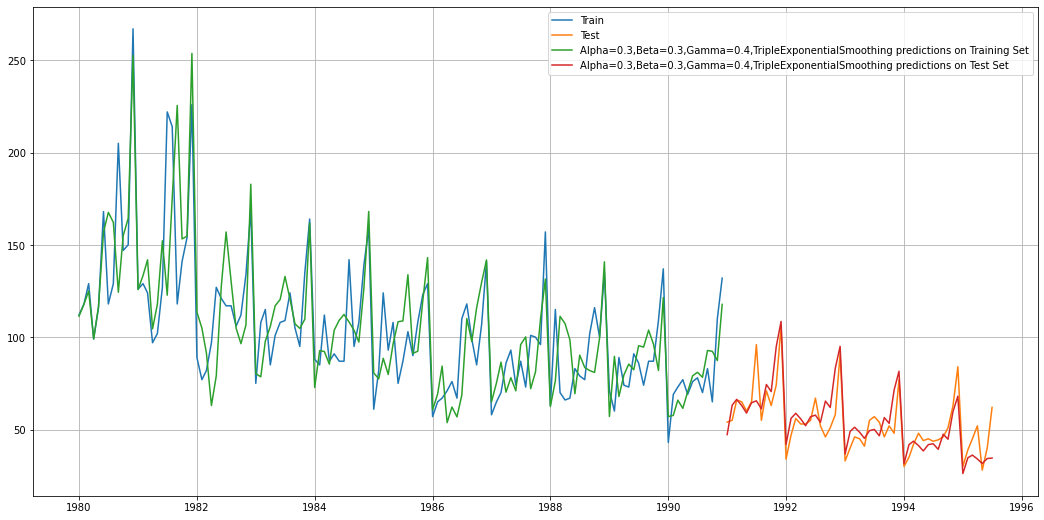

In [207]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [208]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][1]],'Test MAPE':[resultsDf_8_2['Test MAPE'][1]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     15.291197      22.94
NaiveModel                                           79.777253     145.35
SimpleAverageModel                                   53.520722      95.12
2pointTrailingMovingAverage                          11.530180      13.60
4pointTrailingMovingAverage                          14.462023      19.59
6pointTrailingMovingAverage                          14.586830      20.83
9pointTrailingMovingAverage                          14.739957      21.12
Alpha=1,SimpleExponentialSmoothing                   36.857739      64.04
Alpha=0.3,SimpleExponentialSmoothing                 47.565460      83.89
Alpha=0.4,SimpleExponentialSmoothing                 53.827534      95.70
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.638869     443.04
Alpha=0.106,Beta=0.0484,Gamma=0.0,TripleExponen...   17.443897      29.01
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...   10.150082      13.58

In [209]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                      Test RMSE  Test MAPE
Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialS...   10.150082      13.58
2pointTrailingMovingAverage                          11.530180      13.60
4pointTrailingMovingAverage                          14.462023      19.59
6pointTrailingMovingAverage                          14.586830      20.83
9pointTrailingMovingAverage                          14.739957      21.12
RegressionOnTime                                     15.291197      22.94
Alpha=0.106,Beta=0.0484,Gamma=0.0,TripleExponen...   17.443897      29.01
Alpha=1,SimpleExponentialSmoothing                   36.857739      64.04
Alpha=0.3,SimpleExponentialSmoothing                 47.565460      83.89
SimpleAverageModel                                   53.520722      95.12
Alpha=0.4,SimpleExponentialSmoothing                 53.827534      95.70
NaiveModel                                           79.777253     145

# We see that the best model is the Triple Exponential Smoothing with additive seasonality with the parameters  𝛼  = 0.3,  𝛽  = 0.3 and  𝛾  = 0.4.

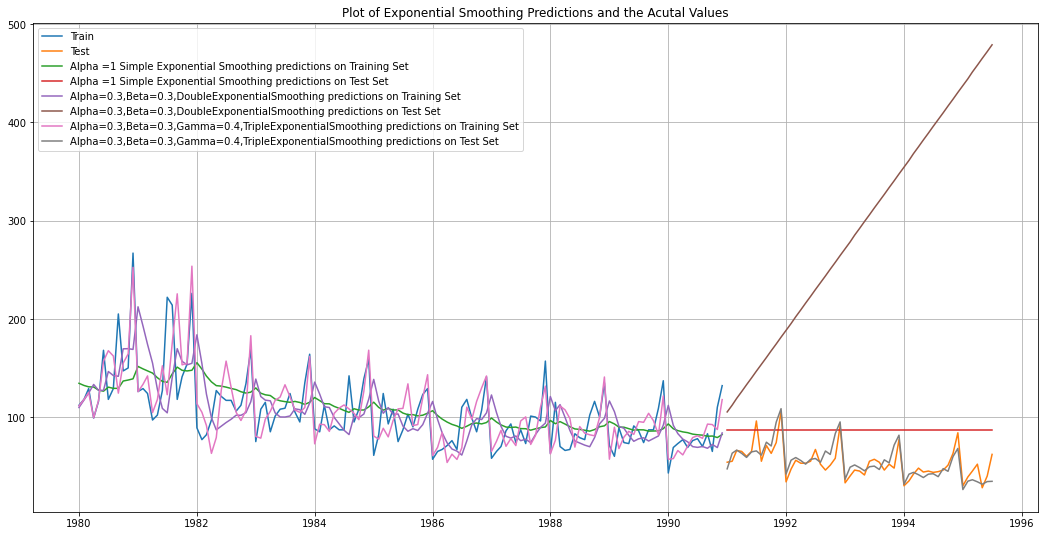

In [210]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_train['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_train['predict', 0.3, 0.3,0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.3, 0.3,0.4], label='Alpha=0.3,Beta=0.3,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

# 5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.


# Check for stationarity of the whole Time Series data.

In [211]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

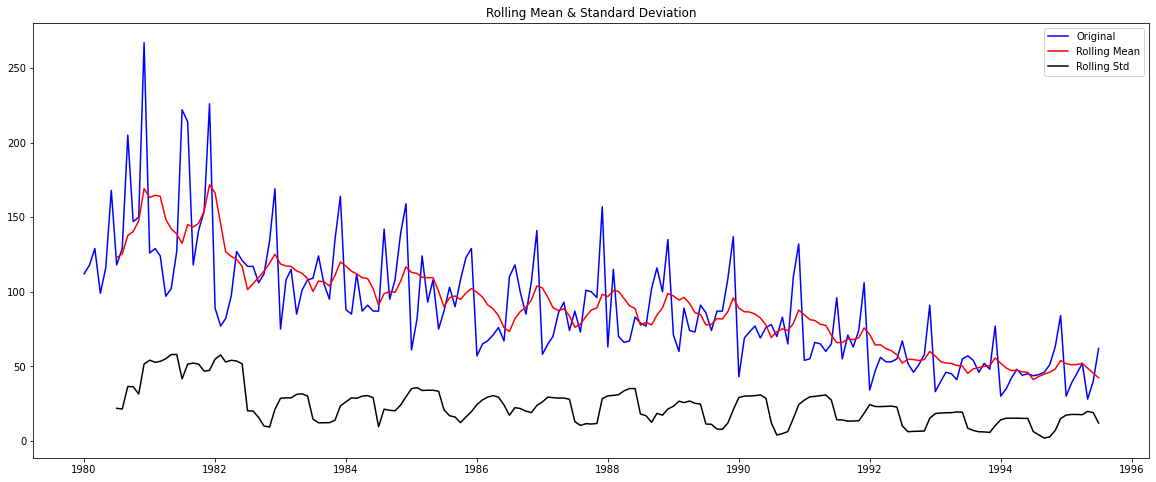

Results of Dickey-Fuller Test:
Test Statistic                  -1.873514
p-value                          0.344622
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [212]:
test_stationarity(df_rose['Rose'])

<b> Series is not stationary  as we have P value as 0.344622
    We see that  Time Series is non-stationary
    Let us take a difference of order 1 and check whether the Time Series is stationary or not.

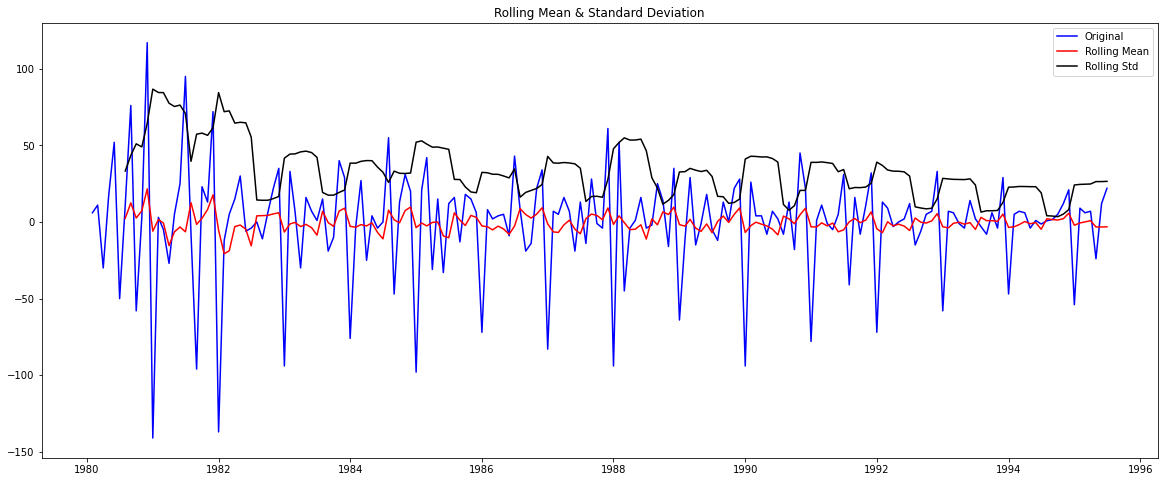

Results of Dickey-Fuller Test:
Test Statistic                -8.043389e+00
p-value                        1.821563e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [213]:
test_stationarity(df_rose['Rose'].diff().dropna())

<b>At  𝛼  = 0.05 the Time Series is stationary

# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [214]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

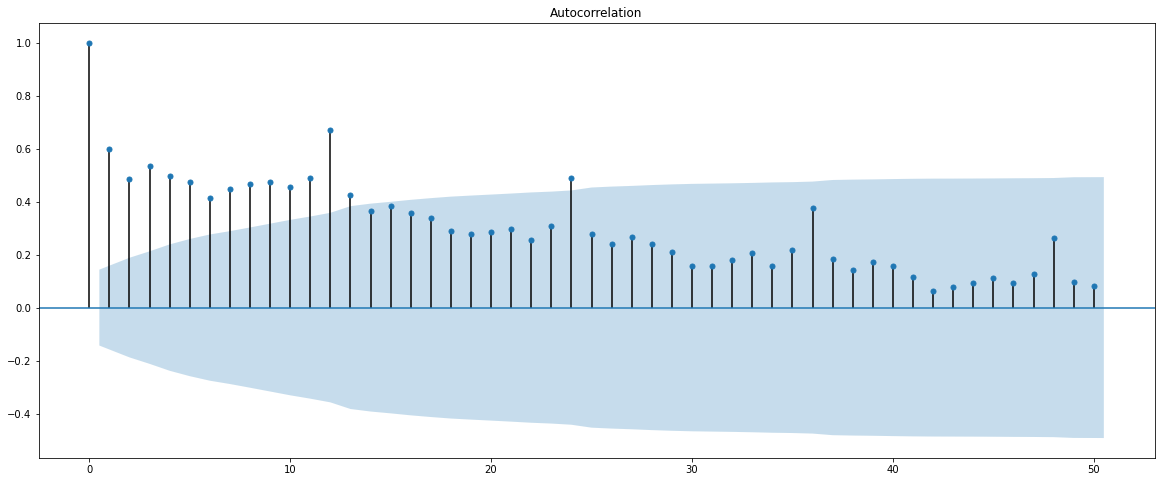

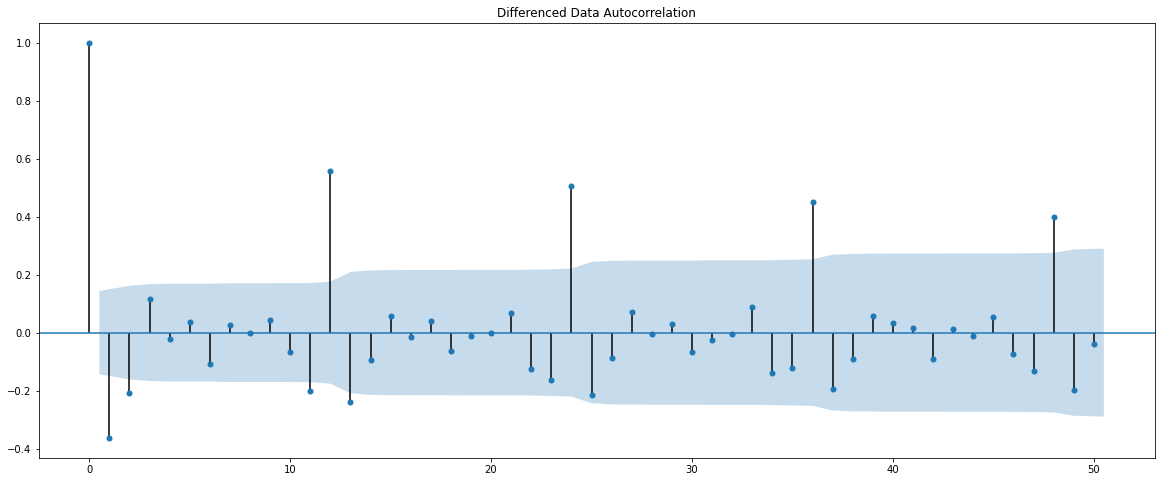

In [215]:
plot_acf(df_rose['Rose'],lags=50)
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

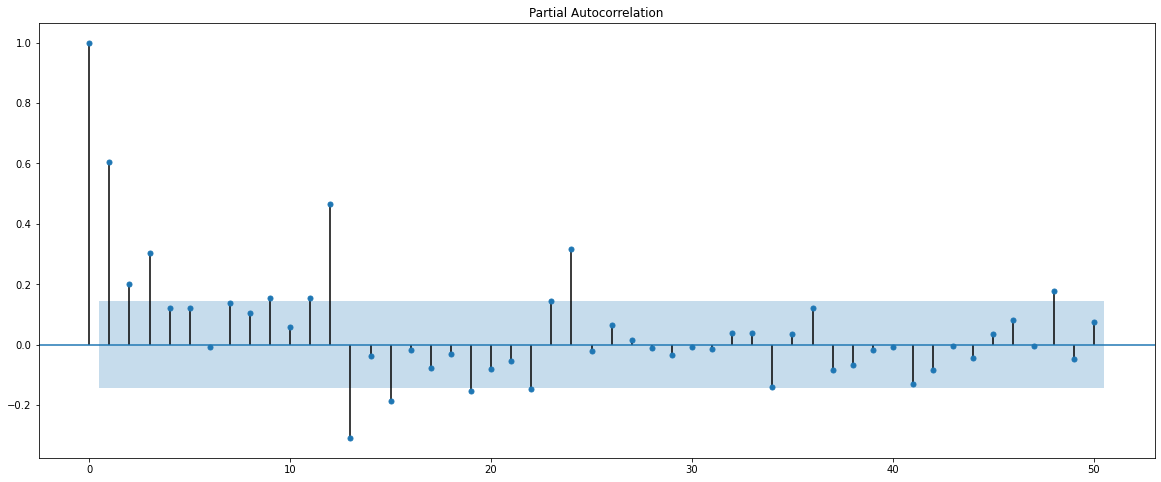

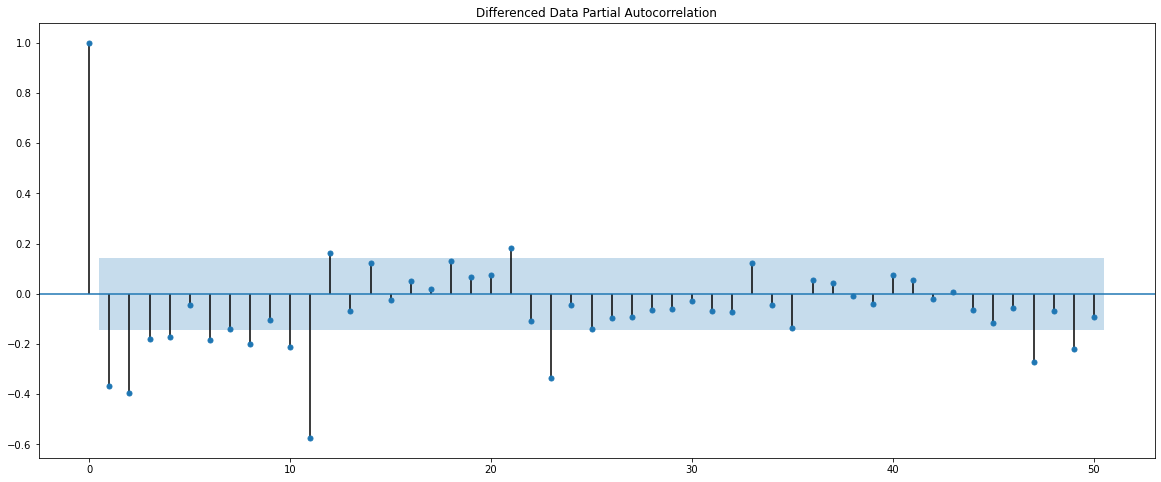

In [216]:
plot_pacf(df_rose['Rose'],lags=50)
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

<b>From the above plots, we can say that there seems to be a seasonality in the data.

# Split the data into train and test and plot the training and test data.

In [218]:
train=df_rose[df_rose.index.year < 1991]
test=df_rose[df_rose.index.year >= 1991]

In [219]:
display(train.head(1))
display(train.tail(1))
display(test.head(1))
display(test.tail(1))

Rose
YearMonth        
1980-01-01  112.0

Rose
YearMonth        
1990-12-01  132.0

Rose
YearMonth       
1991-01-01  54.0

Rose
YearMonth       
1995-07-01  62.0

# Check for stationarity of the Training Data Time Series

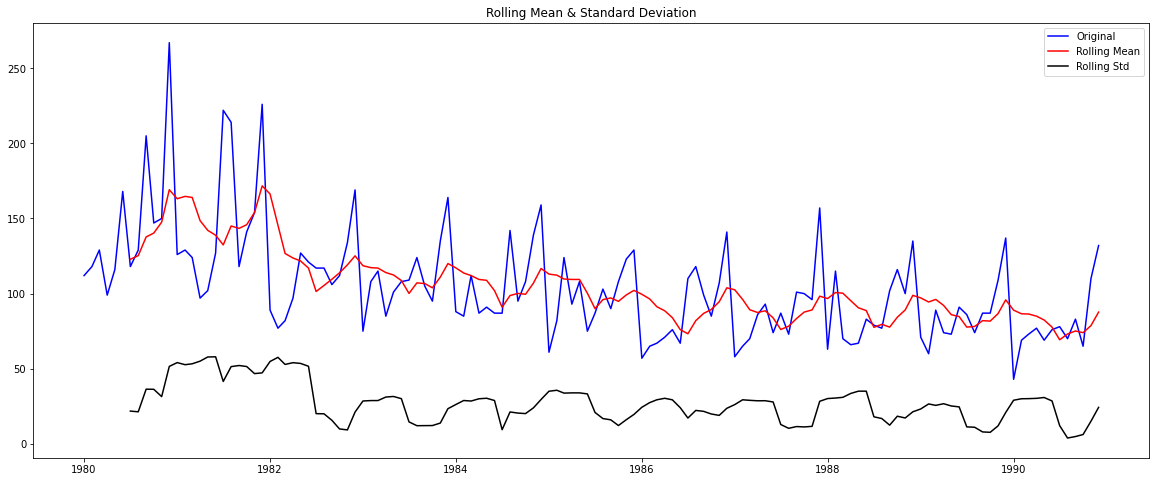

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [221]:
test_stationarity(train['Rose'])

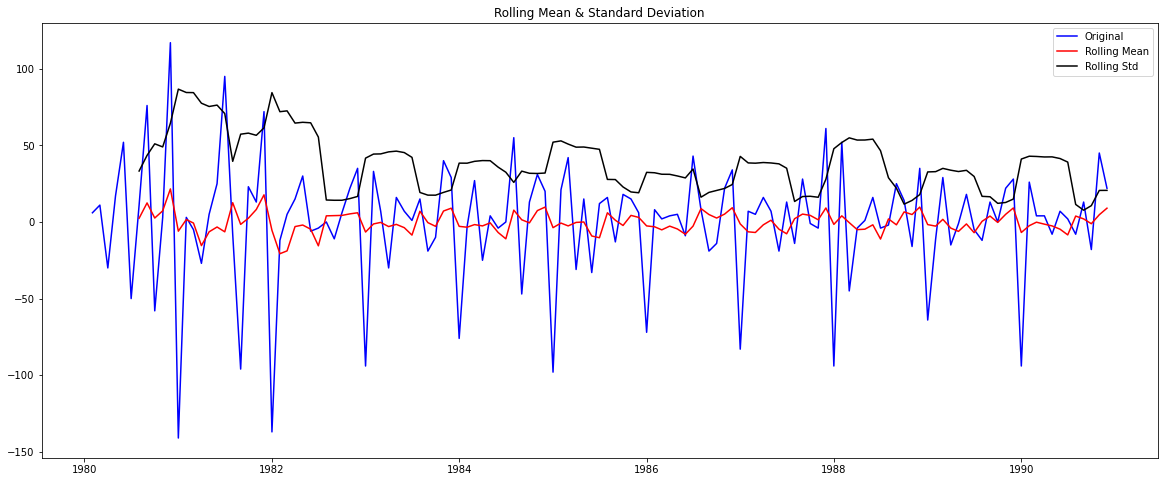

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [222]:
test_stationarity(train['Rose'].diff().dropna())

In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


# 6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [224]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [225]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [226]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464554
ARIMA(0, 1, 2) - AIC:1276.8353817544007
ARIMA(1, 1, 0) - AIC:1319.3483105802075
ARIMA(1, 1, 1) - AIC:1277.775755635179
ARIMA(1, 1, 2) - AIC:1277.3592234180092
ARIMA(2, 1, 0) - AIC:1300.6092611744416
ARIMA(2, 1, 1) - AIC:1279.0456894093172
ARIMA(2, 1, 2) - AIC:1279.2986939365132


In [227]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835382
5  (1, 1, 2)  1277.359223
4  (1, 1, 1)  1277.775756
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [228]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.168
Date:                Sun, 13 Sep 2020   AIC                           1276.835
Time:                        18:45:20   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7600      0.101     -7.500      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

# Predict on the Test Set using this model and evaluate the model.

In [229]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [230]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.64189579887517


In [231]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0, 1, 2)'])

resultsDf

RMSE
ARIMA(0, 1, 2)  15.641896

# 7.	Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

# Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

In [232]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,10

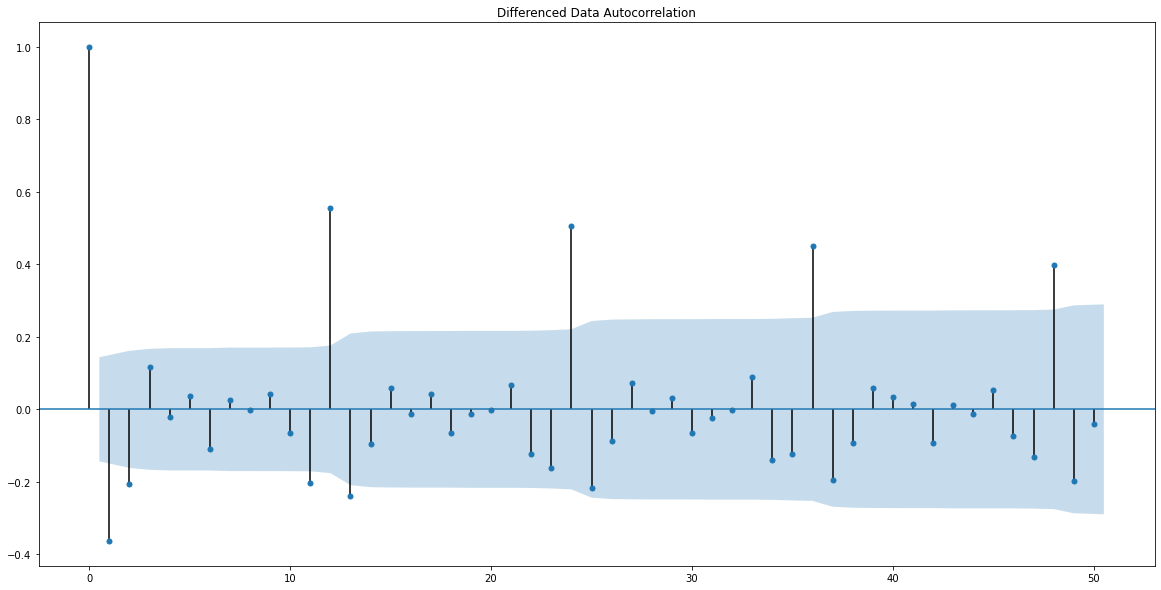

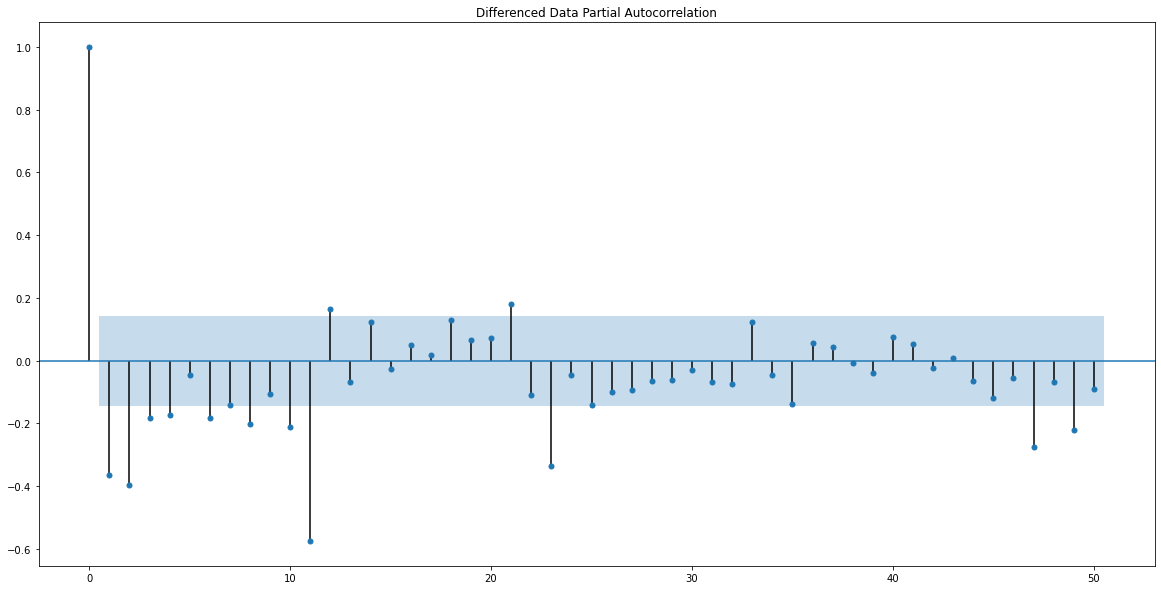

In [233]:
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [234]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 13 Sep 2020   AIC                           1279.299
Time:                        18:46:57   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

# Predict on the Test Set using this model and evaluate the model.

In [235]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [236]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.376311779859899


In [237]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Manual ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0, 1, 2)       15.641896
Manual ARIMA(2,1,2)  15.376312

We see that the difference in RMSE values is about 2 with a much simpler model built.

# 6.	Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).¶

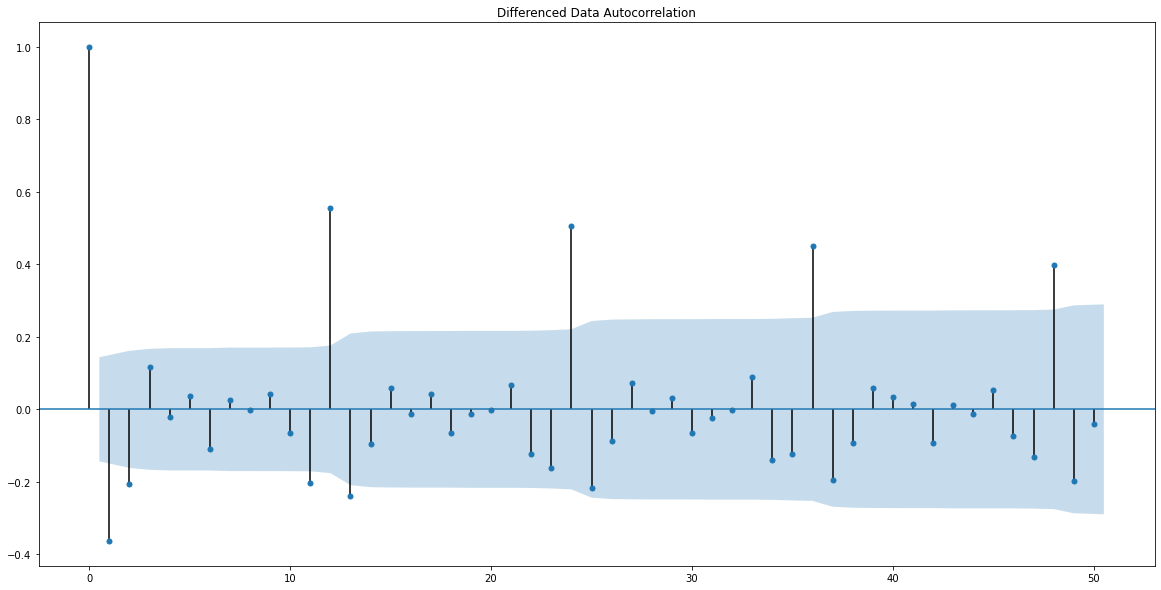

In [238]:
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

# Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [239]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [240]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [241]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:1264.4996261113854
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1144.7077471827354
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:1241.7870945149068
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1146.3093266722028
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1137.453362951523
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1117.022442618241
SARIMA(0, 1, 1)x(0, 0, 0, 6)7 - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6)7 - AIC:1201.383254802954
SARIMA(0, 1, 1)x(0, 0, 2, 6)7 - AIC:1097.190821775278
SARIMA(0, 1, 1)x(1, 0, 0, 6)7 - AIC:1222.435473574505
SARIMA(0, 1, 1)x(1, 0, 1, 6)7 - AIC:1160.4386253746404
SARIMA(0, 1, 1)x(1, 0, 2, 6)7 - AIC:1084.856412417653
SARIMA(0, 1, 1)x(2, 0, 0, 6)7 - AIC:1095.7490379982435
SARIMA(0, 1, 1)x(2, 0, 1, 6)7 - AIC:1097.6455182373986
SARIMA(0, 1, 1)x(2, 0, 2, 6)7 - AIC:1053.0044082621644
SARIMA(0, 1, 2)x

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 0, 2, 6)7 - AIC:1078.6114741156282
SARIMA(2, 1, 1)x(0, 0, 0, 6)7 - AIC:1263.231523180138
SARIMA(2, 1, 1)x(0, 0, 1, 6)7 - AIC:1201.4126986467886
SARIMA(2, 1, 1)x(0, 0, 2, 6)7 - AIC:1092.4754616553782
SARIMA(2, 1, 1)x(1, 0, 0, 6)7 - AIC:1199.8335862393947
SARIMA(2, 1, 1)x(1, 0, 1, 6)7 - AIC:1161.5686919136672
SARIMA(2, 1, 1)x(1, 0, 2, 6)7 - AIC:1079.8188703385456
SARIMA(2, 1, 1)x(2, 0, 0, 6)7 - AIC:1071.6995915092396
SARIMA(2, 1, 1)x(2, 0, 1, 6)7 - AIC:1068.4781627387795
SARIMA(2, 1, 1)x(2, 0, 2, 6)7 - AIC:1051.673460752296
SARIMA(2, 1, 2)x(0, 0, 0, 6)7 - AIC:1253.9102116146682
SARIMA(2, 1, 2)x(0, 0, 1, 6)7 - AIC:1185.7691921995224
SARIMA(2, 1, 2)x(0, 0, 2, 6)7 - AIC:1082.5581033341427
SARIMA(2, 1, 2)x(1, 0, 0, 6)7 - AIC:1200.4217492510984
SARIMA(2, 1, 2)x(1, 0, 1, 6)7 - AIC:1150.7283264886526
SARIMA(2, 1, 2)x(1, 0, 2, 6)7 - AIC:1063.1103219011811
SARIMA(2, 1, 2)x(2, 0, 0, 6)7 - AIC:1073.6961457865352
SARIMA(2, 1, 2)x(2, 0, 1, 6)7 - AIC:1070.0771798907037
SARIMA(2, 1,

In [242]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1041.655820
26  (0, 1, 2)  (2, 0, 2, 6)  1043.600261
80  (2, 1, 2)  (2, 0, 2, 6)  1045.230991
71  (2, 1, 1)  (2, 0, 2, 6)  1051.673461
44  (1, 1, 1)  (2, 0, 2, 6)  1052.778470

In [243]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sun, 13 Sep 2020   AIC                           1041.656
Time:                                   18:51:09   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5940      0.152     -3.900      0.000      -0.892      -0.295
ma.L1         -0.1954    102.787     -0.002

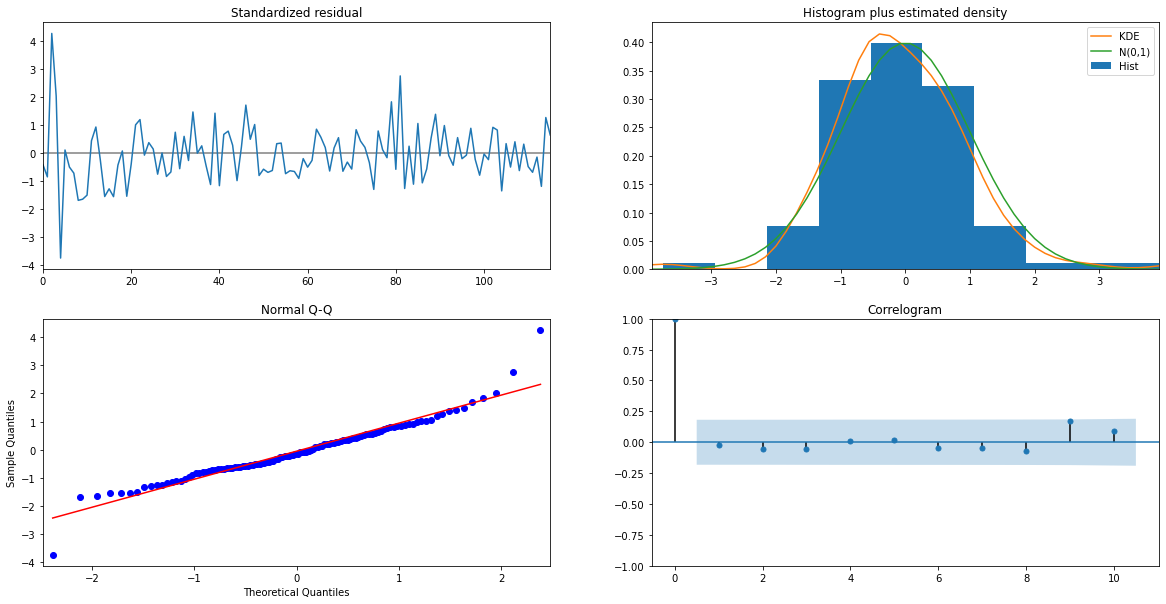

In [244]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [245]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [246]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.842167  18.847335      25.902068      99.782266
1  67.631691  19.299045      29.806257     105.457125
2  74.747453  19.411591      36.701434     112.793472
3  71.326539  19.474538      33.157147     109.495931
4  76.017189  19.482819      37.831564     114.202813

In [247]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

26.21007013570613


In [248]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1, 1, 2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0, 1, 2)            15.641896
Manual ARIMA(2,1,2)       15.376312
SARIMA(1, 1, 2)(2,0,2,6)  26.210070

# Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [249]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [250]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [251]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207407
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380886
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.020786938585
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635753065
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945832
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1098.555482591834
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:923.6314049383832
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1095.7936324918119
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.7434330945262
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:918.8573483309838
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:914.598286653579
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:915.3332430461664
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:901.1988288274572
SARIMA

In [252]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
53  (1, 1, 2)  (2, 0, 2, 12)  889.871767
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [253]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 13 Sep 2020   AIC                            887.938
Time:                                    18:55:37   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.938     -0.004      0.996    -373.114     371.428
ma.L2         -0.1573     29.840   

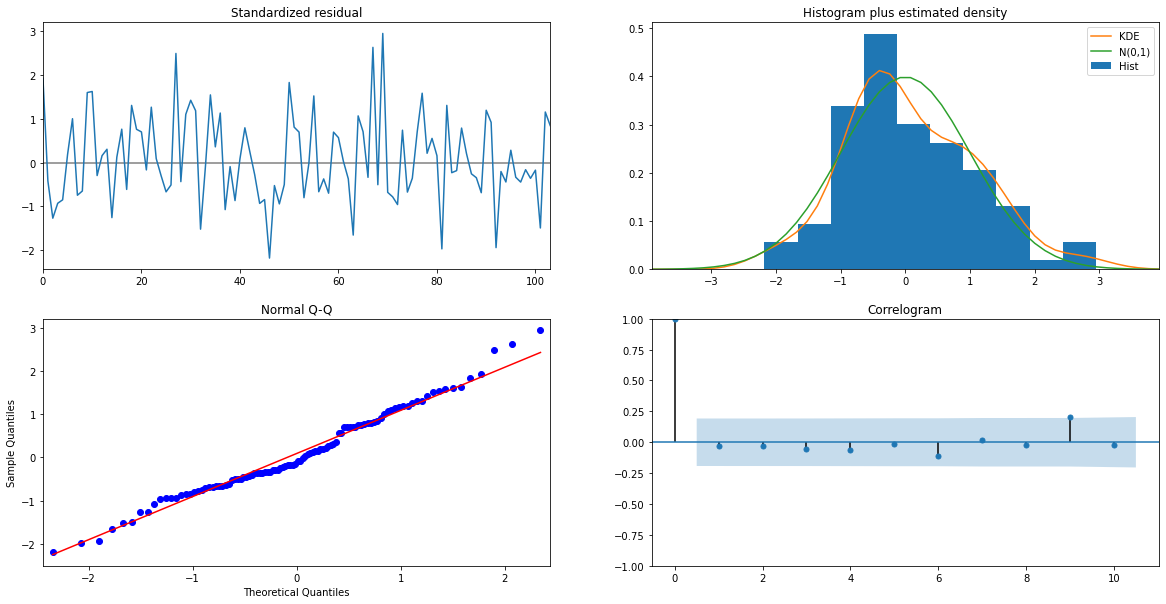

In [254]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [255]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [256]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867265  15.928501      31.647977      94.086553
1  70.541190  16.147659      38.892360     102.190020
2  77.356411  16.147657      45.707586     109.005236
3  76.208814  16.147657      44.559988     107.857639
4  72.747398  16.147657      41.098573     104.396223

In [257]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.991266821214108


In [258]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0, 1, 2)(2, 0, 2, 12)'])

resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0, 1, 2)                15.641896
Manual ARIMA(2,1,2)           15.376312
SARIMA(1, 1, 2)(2,0,2,6)      26.210070
SARIMA(0, 1, 2)(2, 0, 2, 12)  26.991267

# 7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

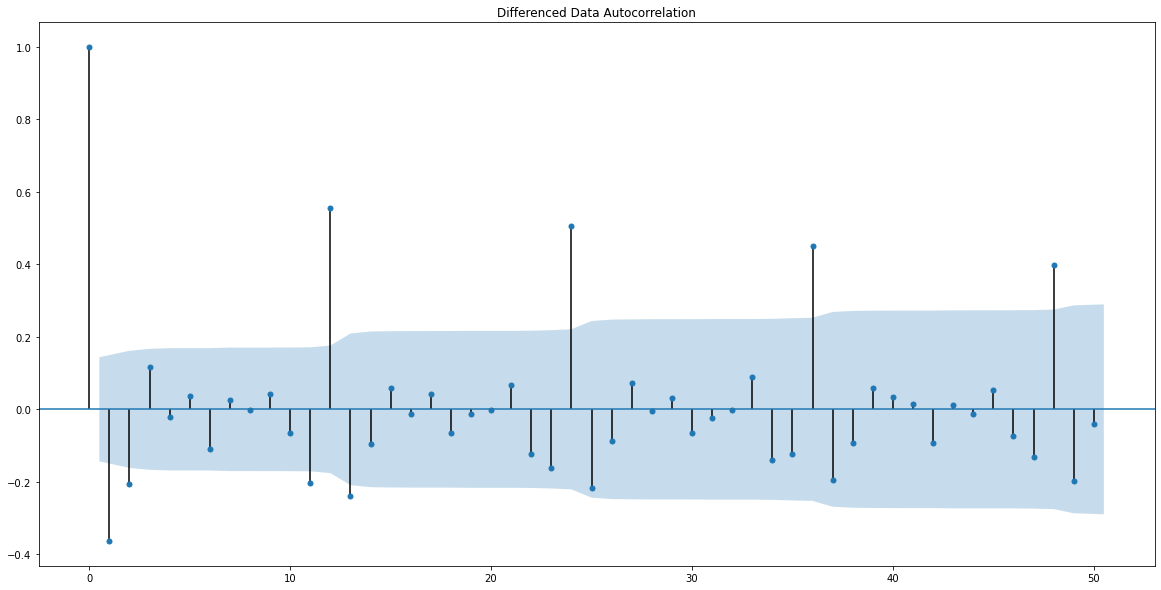

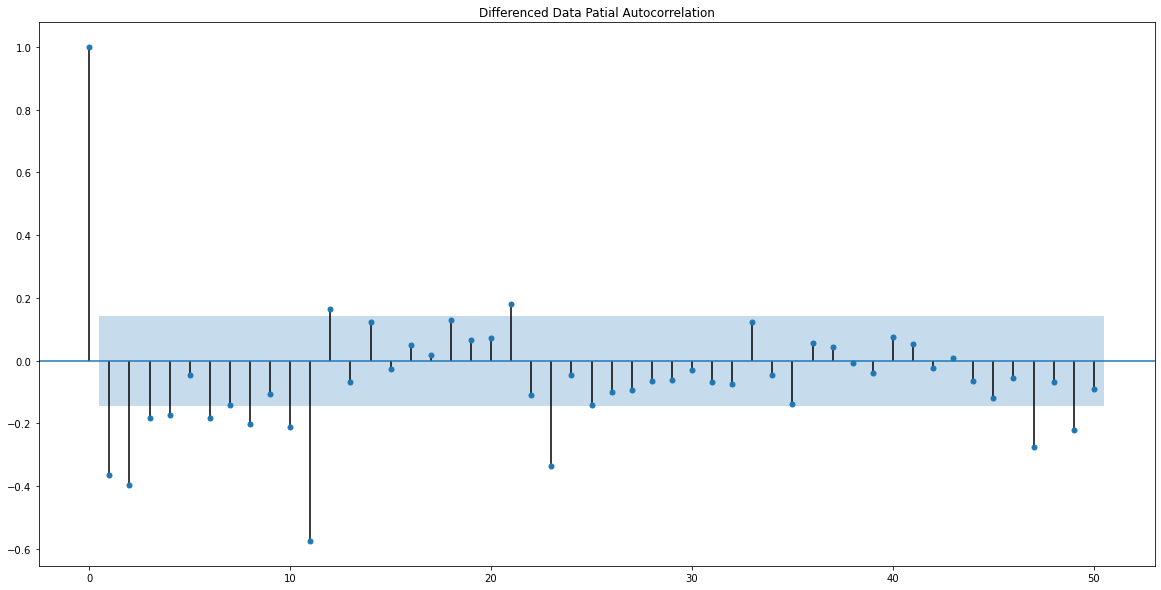

In [259]:
plot_acf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

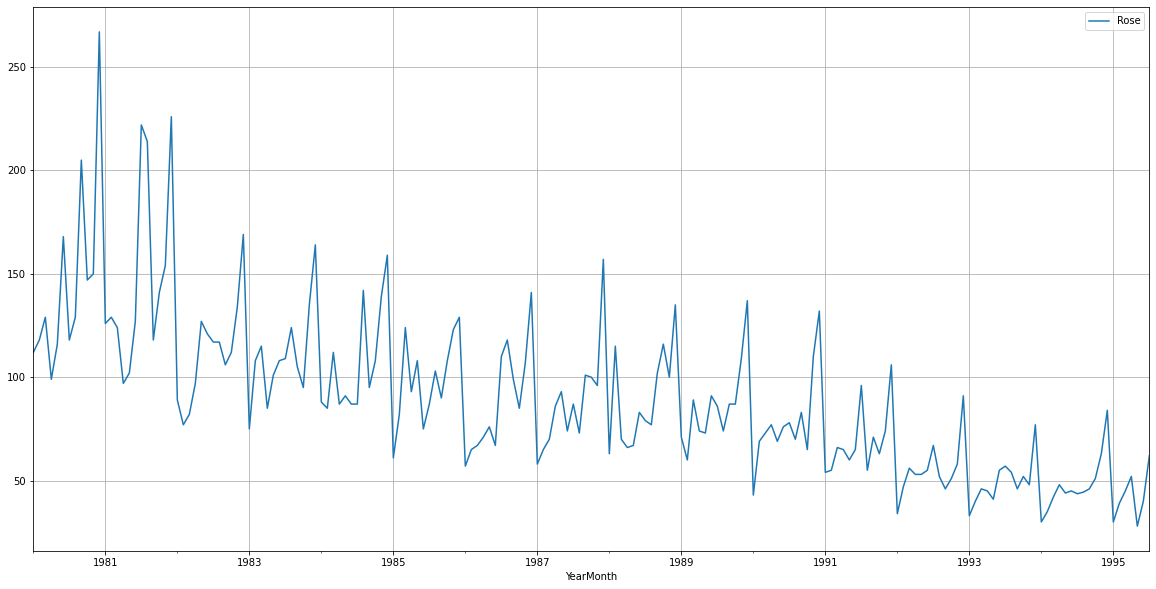

In [260]:
df_rose.plot()
plt.grid();

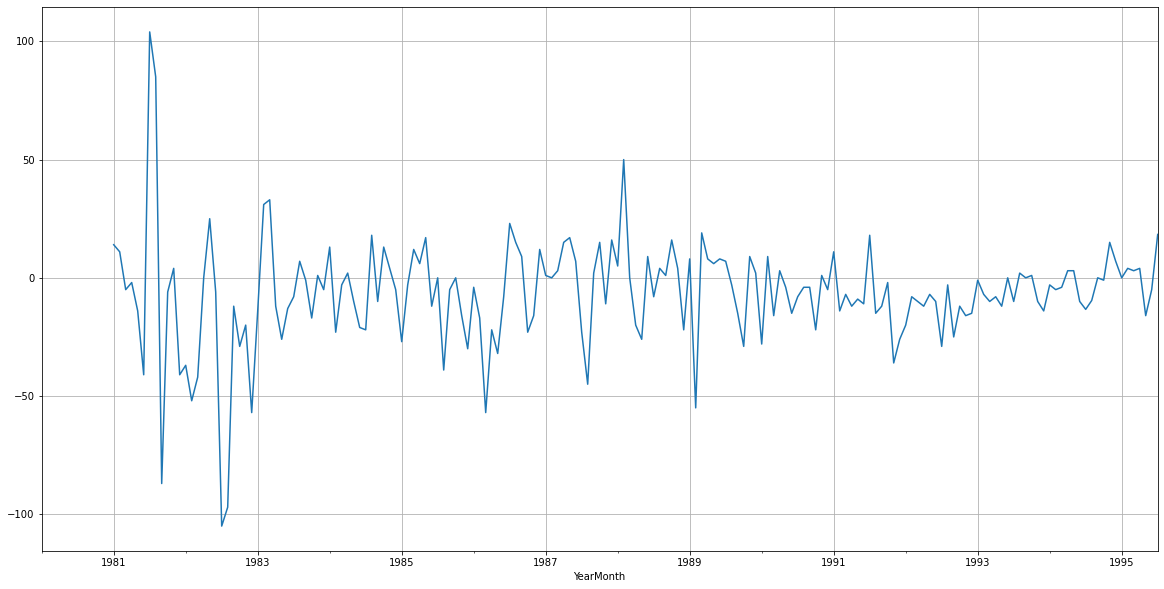

In [261]:
(df_rose['Rose'].diff(12)).plot()
plt.grid();

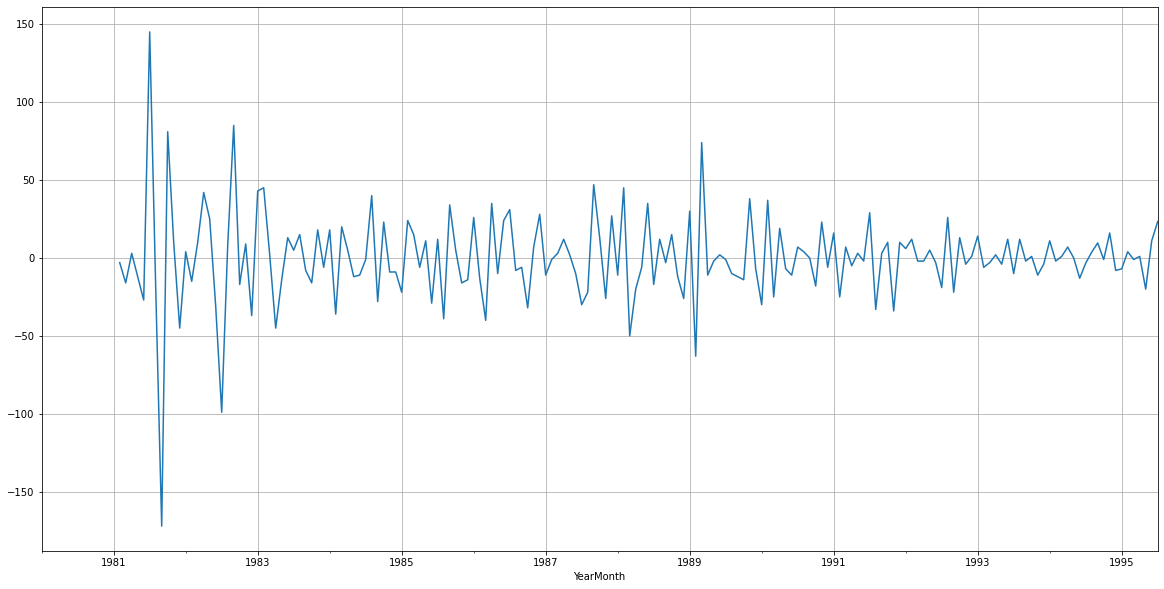

In [262]:
(df_rose['Rose'].diff(12)).diff().plot()
plt.grid();

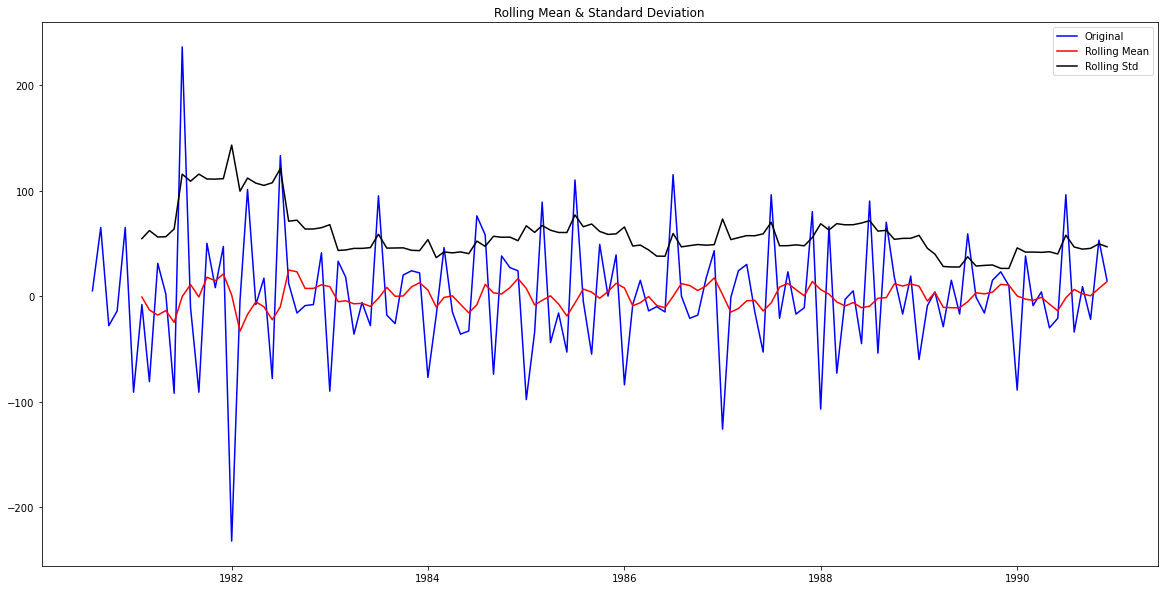

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [263]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

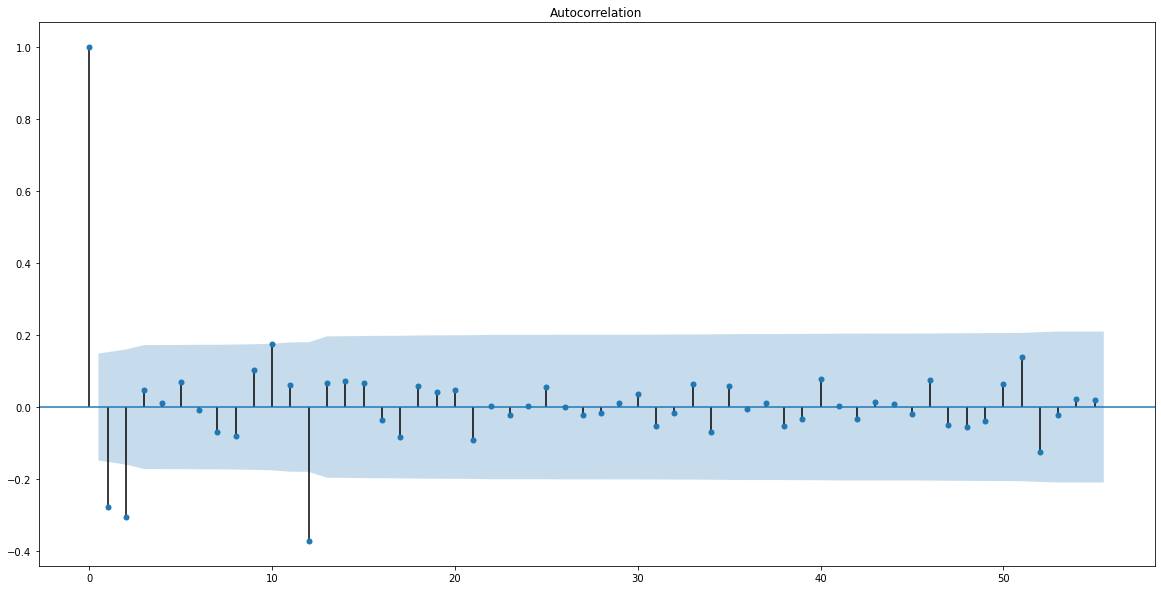

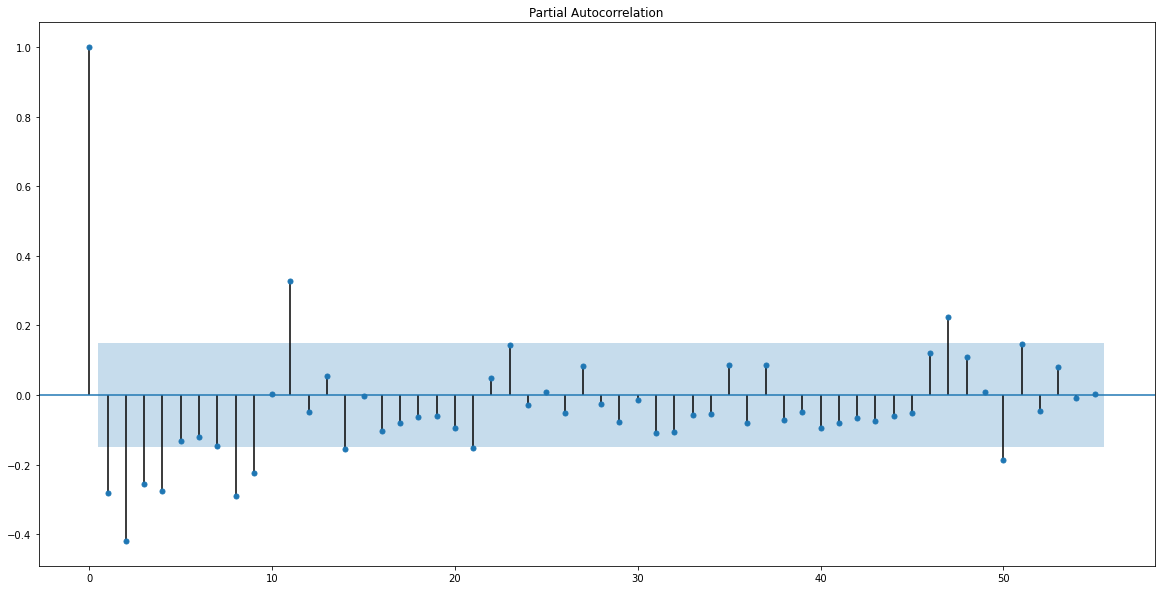

In [264]:
plot_acf((df_rose['Rose'].diff(12).dropna()).diff(1).dropna(),lags=55)
plot_pacf((df_rose['Rose'].diff(12).dropna()).diff(1).dropna(),lags=55);

In [336]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0,1,2),
                                seasonal_order=(0,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())
#0,1,2 0,1,2,12  -F
#(2,1,2)(2,1,2,12)  --16  --c
#(1,1,1)(2,1,2,12)  --17
#(1,1,1)(1,1,1,12)  --17
#(2,1,1)(2,1,2,12)  --17

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -387.007
Date:                            Sun, 13 Sep 2020   AIC                            784.014
Time:                                    19:07:42   BIC                            796.623
Sample:                                         0   HQIC                           789.103
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8288      0.128     -6.479      0.000      -1.080      -0.578
ma.L2         -0.0603      0.117   

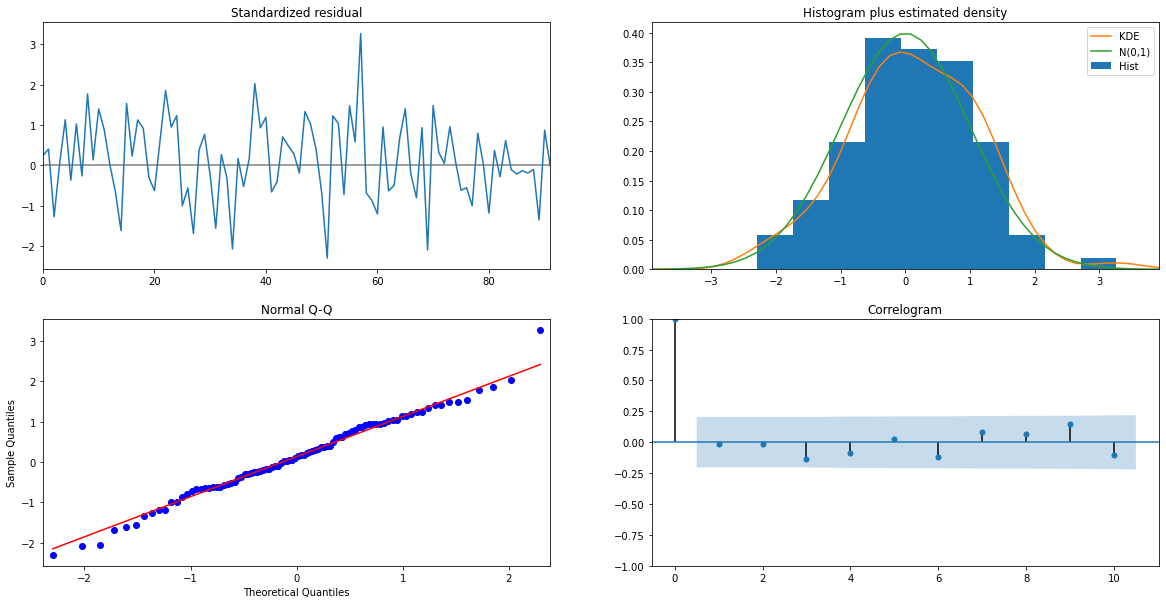

In [337]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [338]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [339]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  43.650767  16.150606      11.996161      75.305372
1  64.198863  16.385600      32.083677      96.314049
2  67.808498  16.483169      35.502081     100.114915
3  67.314428  16.580178      34.817877      99.810979
4  63.584886  16.676622      30.899307      96.270464

In [340]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

16.044814445888825


In [341]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['Manual SARIMA(0,1,2)(0,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(0, 1, 2)                  15.641896
Manual ARIMA(2,1,2)             15.376312
SARIMA(1, 1, 2)(2,0,2,6)        26.210070
SARIMA(0, 1, 2)(2, 0, 2, 12)    26.991267
Manual SARIMA(0,1,2)(0,1,2,12)  16.044814

# 8.	Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [342]:
resultsDf

RMSE
ARIMA(0, 1, 2)                  15.641896
Manual ARIMA(2,1,2)             15.376312
SARIMA(1, 1, 2)(2,0,2,6)        26.210070
SARIMA(0, 1, 2)(2, 0, 2, 12)    26.991267
Manual SARIMA(0,1,2)(0,1,2,12)  16.044814

# 9.	Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

# Manual SARIMA(0,1,2)(0,1,2,12)

# Building the most optimum model on the Full Data.

In [343]:
full_data_model = sm.tsa.statespace.SARIMAX(df_rose['Rose'],
                                order=(0,1,2),
                                seasonal_order=(0,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -596.498
Date:                            Sun, 13 Sep 2020   AIC                           1202.995
Time:                                    19:10:53   BIC                           1217.948
Sample:                                01-01-1980   HQIC                          1209.071
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8092      0.087     -9.255      0.000      -0.981      -0.638
ma.L2         -0.0641      0.081   

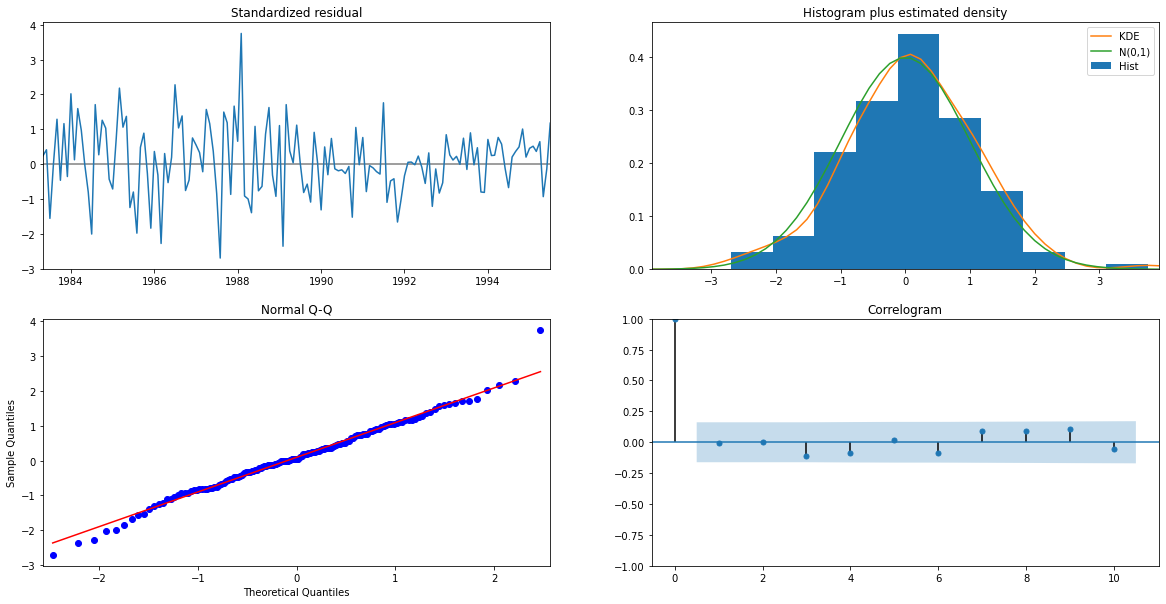

In [344]:
results_full_data_model.plot_diagnostics();

# Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [345]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [346]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.876477  13.937632      16.559221      71.193733
1995-09-01  43.865709  14.188982      16.055815      71.675602
1995-10-01  47.221460  14.298396      19.197118      75.245802
1995-11-01  57.170462  14.406980      28.933300      85.407624
1995-12-01  82.284724  14.514751      53.836334     110.733114

In [347]:
rmse = mean_squared_error(df_rose['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 33.08708494991618


In [348]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-01', freq='MS'))

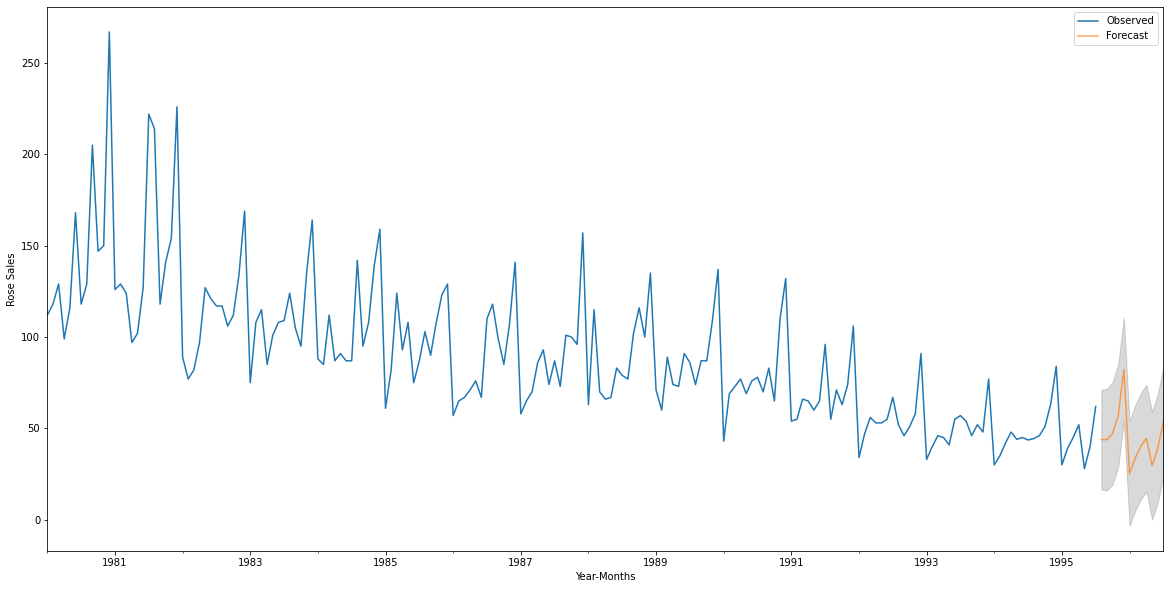

In [349]:
# plot the forecast along with the confidence band

axis = df_rose['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.show()

In [350]:
pred_full_manual_SARIMA_date

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.876477  13.937632      16.559221      71.193733
1995-09-01  43.865709  14.188982      16.055815      71.675602
1995-10-01  47.221460  14.298396      19.197118      75.245802
1995-11-01  57.170462  14.406980      28.933300      85.407624
1995-12-01  82.284724  14.514751      53.836334     110.733114
1996-01-01  25.187731  14.621728      -3.470329      53.845792
1996-02-01  33.718455  14.727928       4.852246      62.584664
1996-03-01  40.189759  14.833368      11.116892      69.262626
1996-04-01  44.623945  14.938063      15.345879      73.902012
1996-05-01  29.578016  15.042030       0.096179      59.059854
1996-06-01  38.894643  15.145283       9.210434      68.578853
1996-07-01  53.565893  15.247837      23.680681      83.451105

# MANUAL ARIMA(0, 1, 2)

In [351]:
Full_data_ARIMA = ARIMA(df_rose['Rose'], order=(0,1,2))

results_full_data_ARIMA = Full_data_ARIMA.fit()

print(results_full_data_ARIMA.summary())

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  186
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -876.969
Method:                       css-mle   S.D. of innovations             26.651
Date:                Sun, 13 Sep 2020   AIC                           1761.938
Time:                        19:21:38   BIC                           1774.841
Sample:                    02-01-1980   HQIC                          1767.167
                         - 07-01-1995                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5233      0.043    -12.036      0.000      -0.609      -0.438
ma.L1.D.Rose    -0.7922      0.082     -9.618      0.000      -0.954      -0.631
ma.L2.D.Rose    -0.2077      0.081     -2.57

In [352]:
predicted_auto_ARIMA = results_full_data_ARIMA.forecast(steps=12)

In [361]:
predicted_auto_ARIMA[0]

array([44.83759707, 40.04581921, 39.52247261, 38.99912602, 38.47577942,
       37.95243283, 37.42908624, 36.90573964, 36.38239305, 35.85904645,
       35.33569986, 34.81235327])

In [369]:
data=predicted_auto_ARIMA[0]

In [366]:
date=pd.date_range(start='1995-08-01',end='1996-07-01',freq='MS')

In [379]:
arima_df=pd.DataFrame(predicted_auto_ARIMA[0],index=date,columns=['Forecast'])

In [380]:
arima_df

Forecast
1995-08-01  44.837597
1995-09-01  40.045819
1995-10-01  39.522473
1995-11-01  38.999126
1995-12-01  38.475779
1996-01-01  37.952433
1996-02-01  37.429086
1996-03-01  36.905740
1996-04-01  36.382393
1996-05-01  35.859046
1996-06-01  35.335700
1996-07-01  34.812353